In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing of library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# reading the data
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [176]:
lead.shape

(9240, 37)

In [177]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [178]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [179]:
# Data Cleaning
# Converting Select values to null values
lead=lead.replace('Select',np.nan)

In [180]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [181]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [182]:
# dropping columns with more than 40% Null Values
lead=lead.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'  ],axis=1)

In [183]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

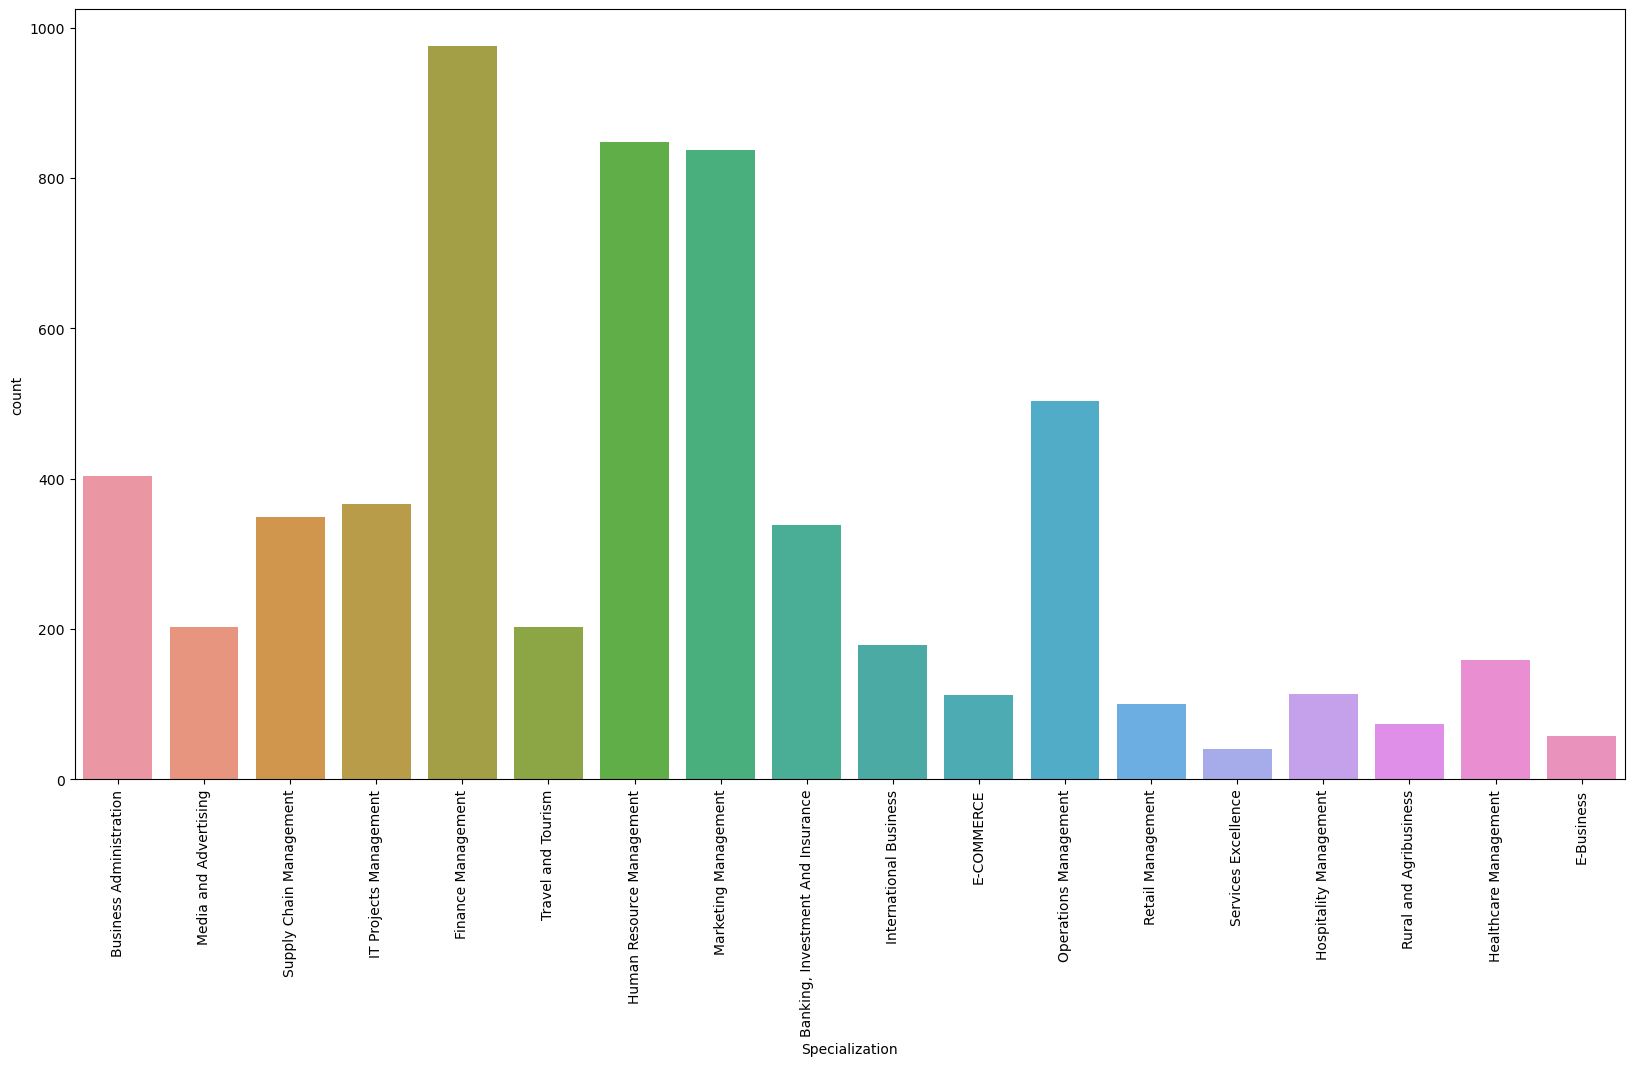

In [184]:
# Analysis of Specialization Column 
plt.figure(figsize=(20,10))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

In [185]:
# For Missing values in the column we can create Separate Category
lead['Specialization']=lead['Specialization'].replace(np.nan,'others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

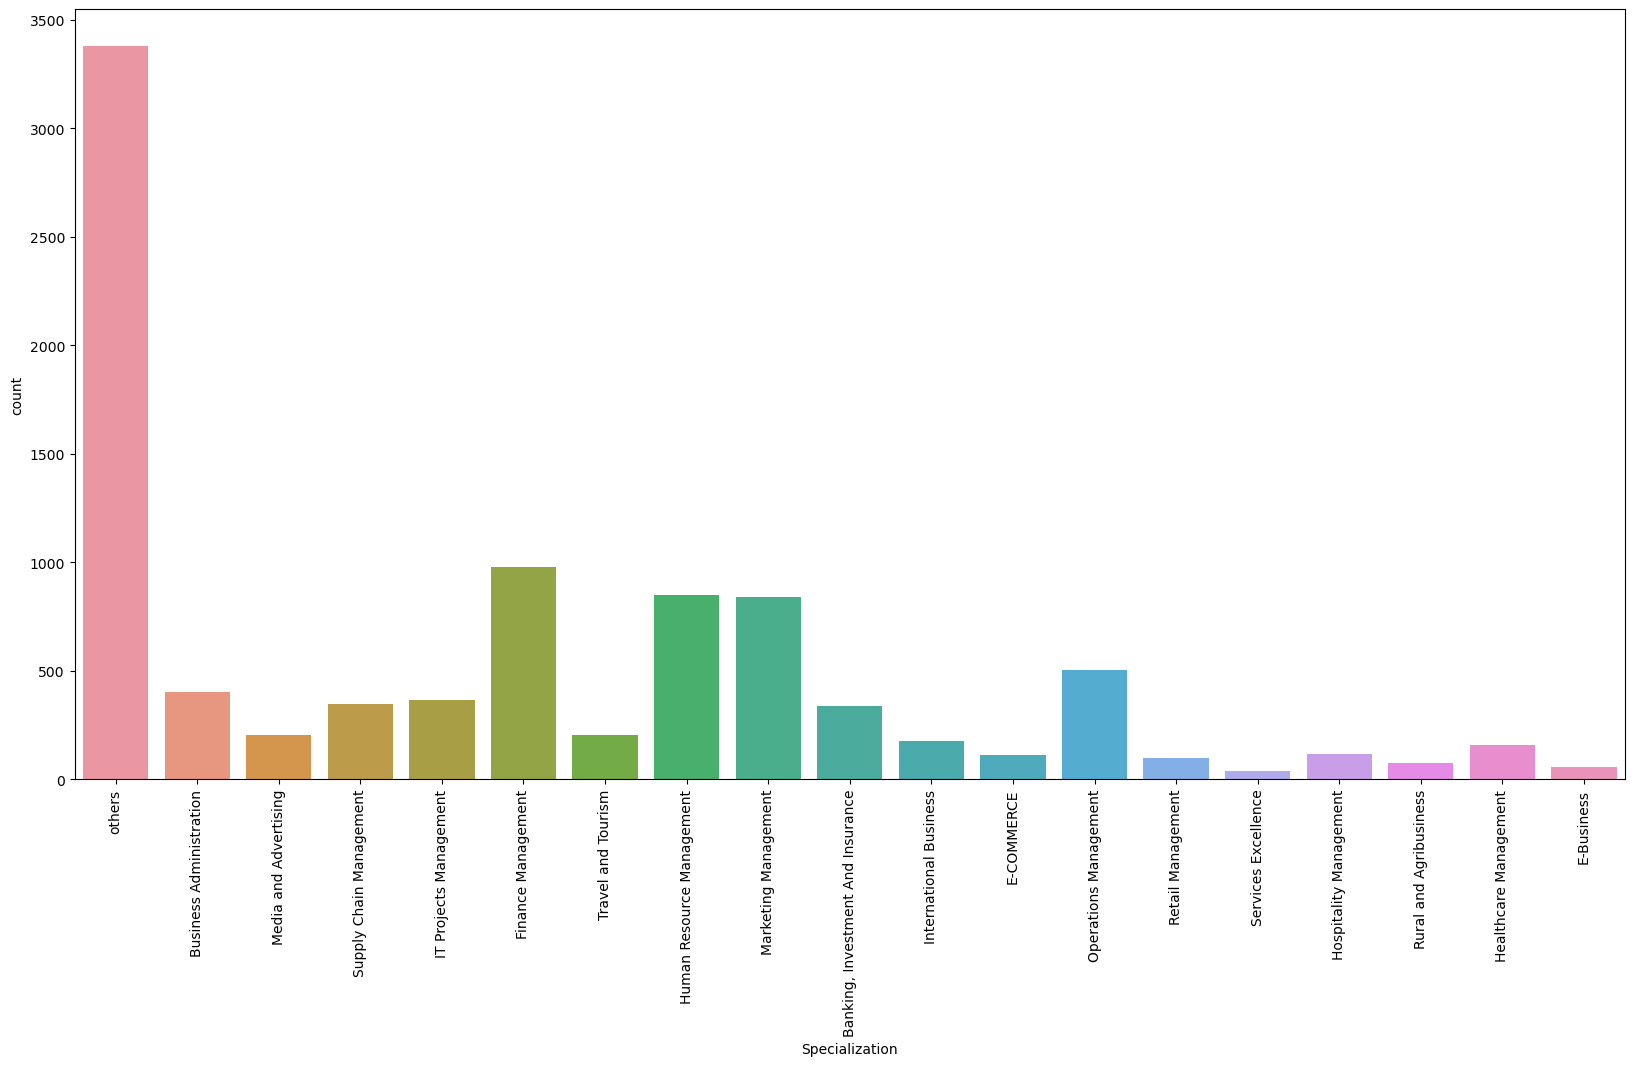

In [186]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

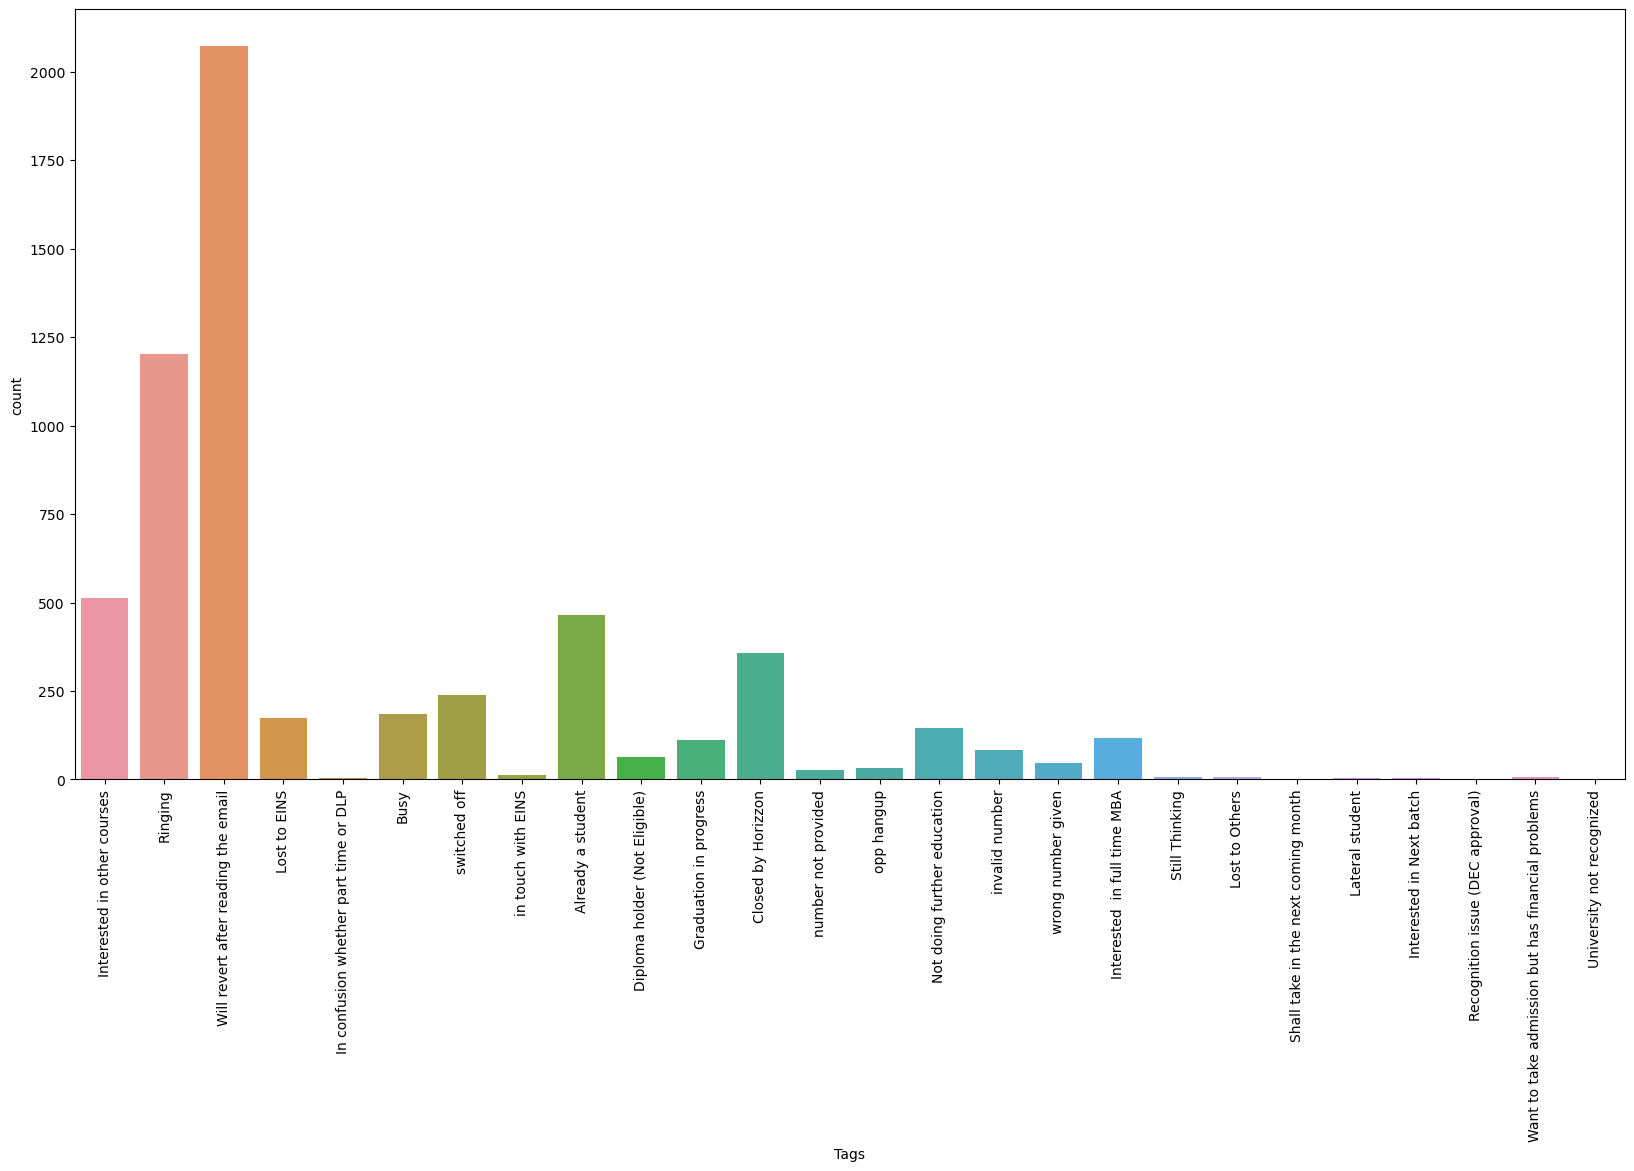

In [187]:
# Analysis of Tags Column
plt.figure(figsize=(20,10))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)

In [188]:
lead['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [189]:
# Most Values are will revert after reading the email same can be imputed for missing values
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email ')

In [190]:
lead['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

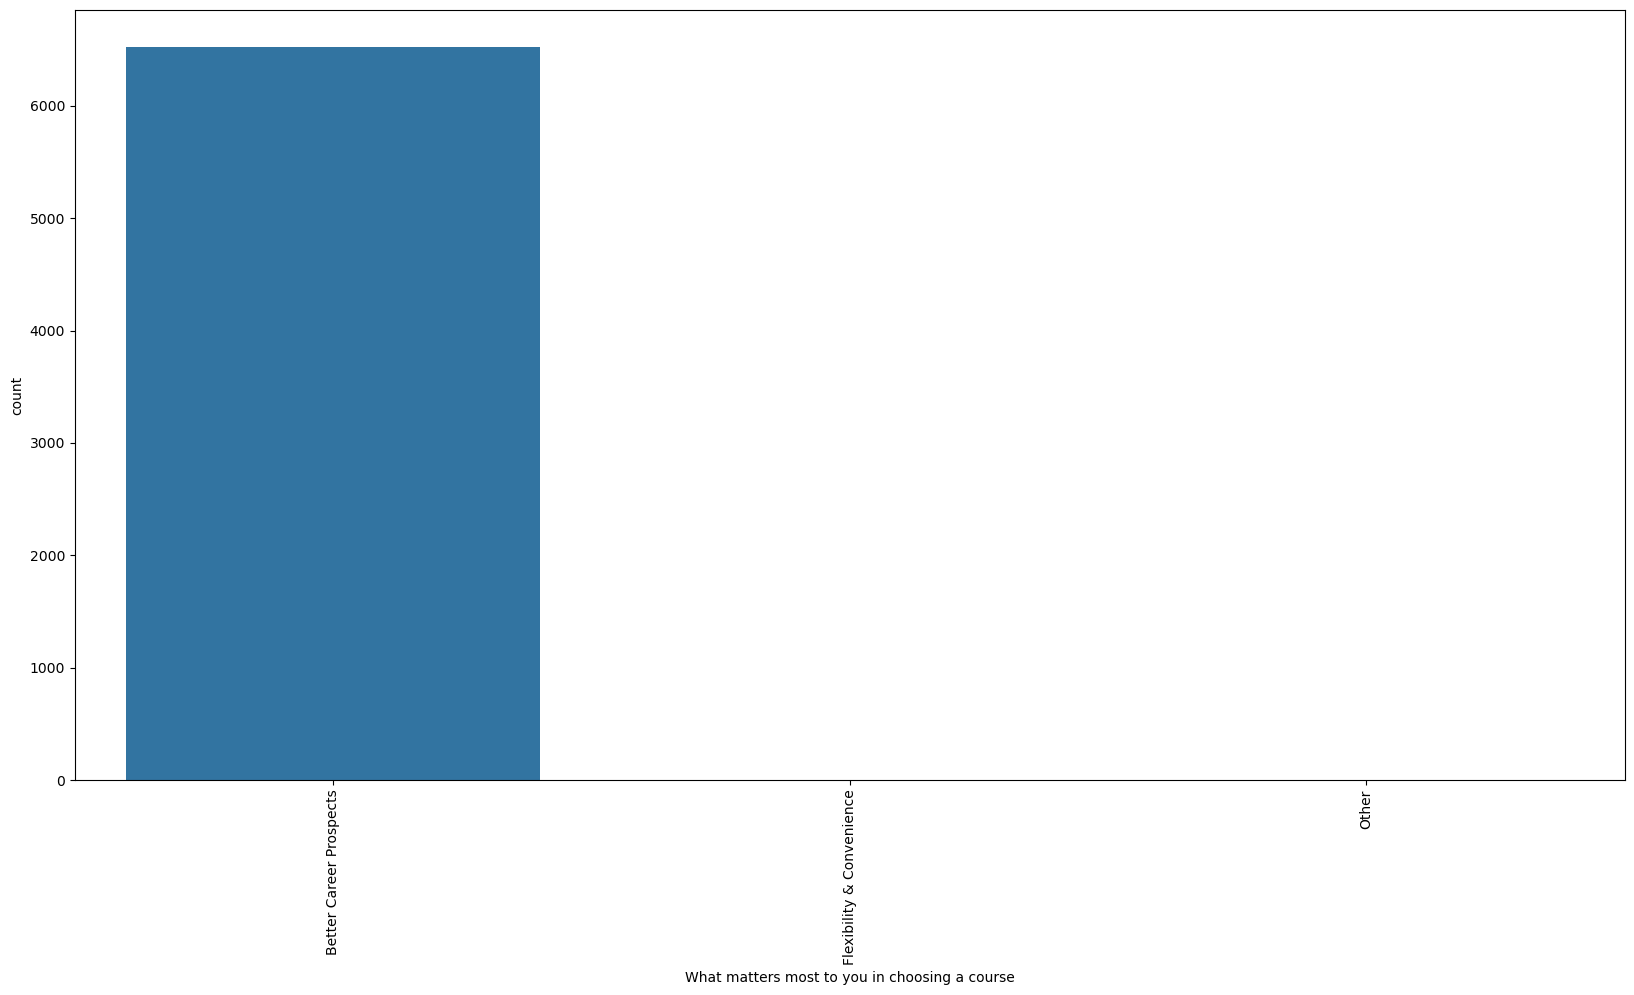

In [191]:
# Analaysis of What matters most to you in choosing a course 

plt.figure(figsize=(20,10))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [192]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [193]:
# Almost all choices are in for better career prospects , will remove this column
lead=lead.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

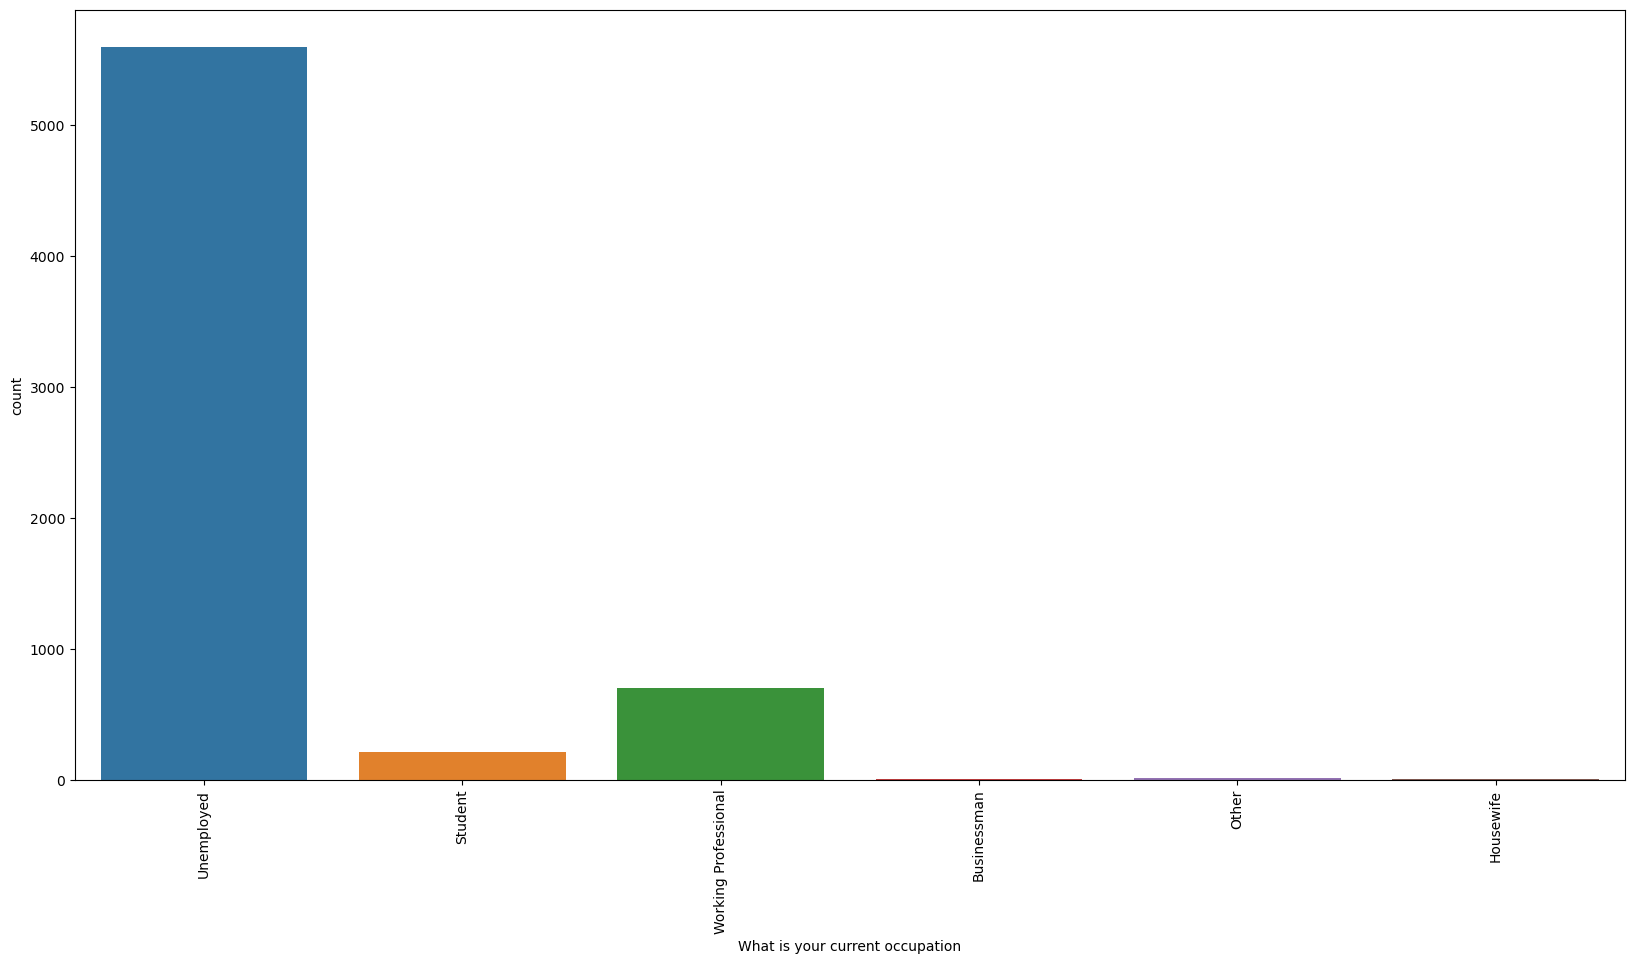

In [194]:
# Analysis of 'What is your current occupation'
plt.figure(figsize=(20,10))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)

In [195]:
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [196]:
# Impute Null Values with Unemployed
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

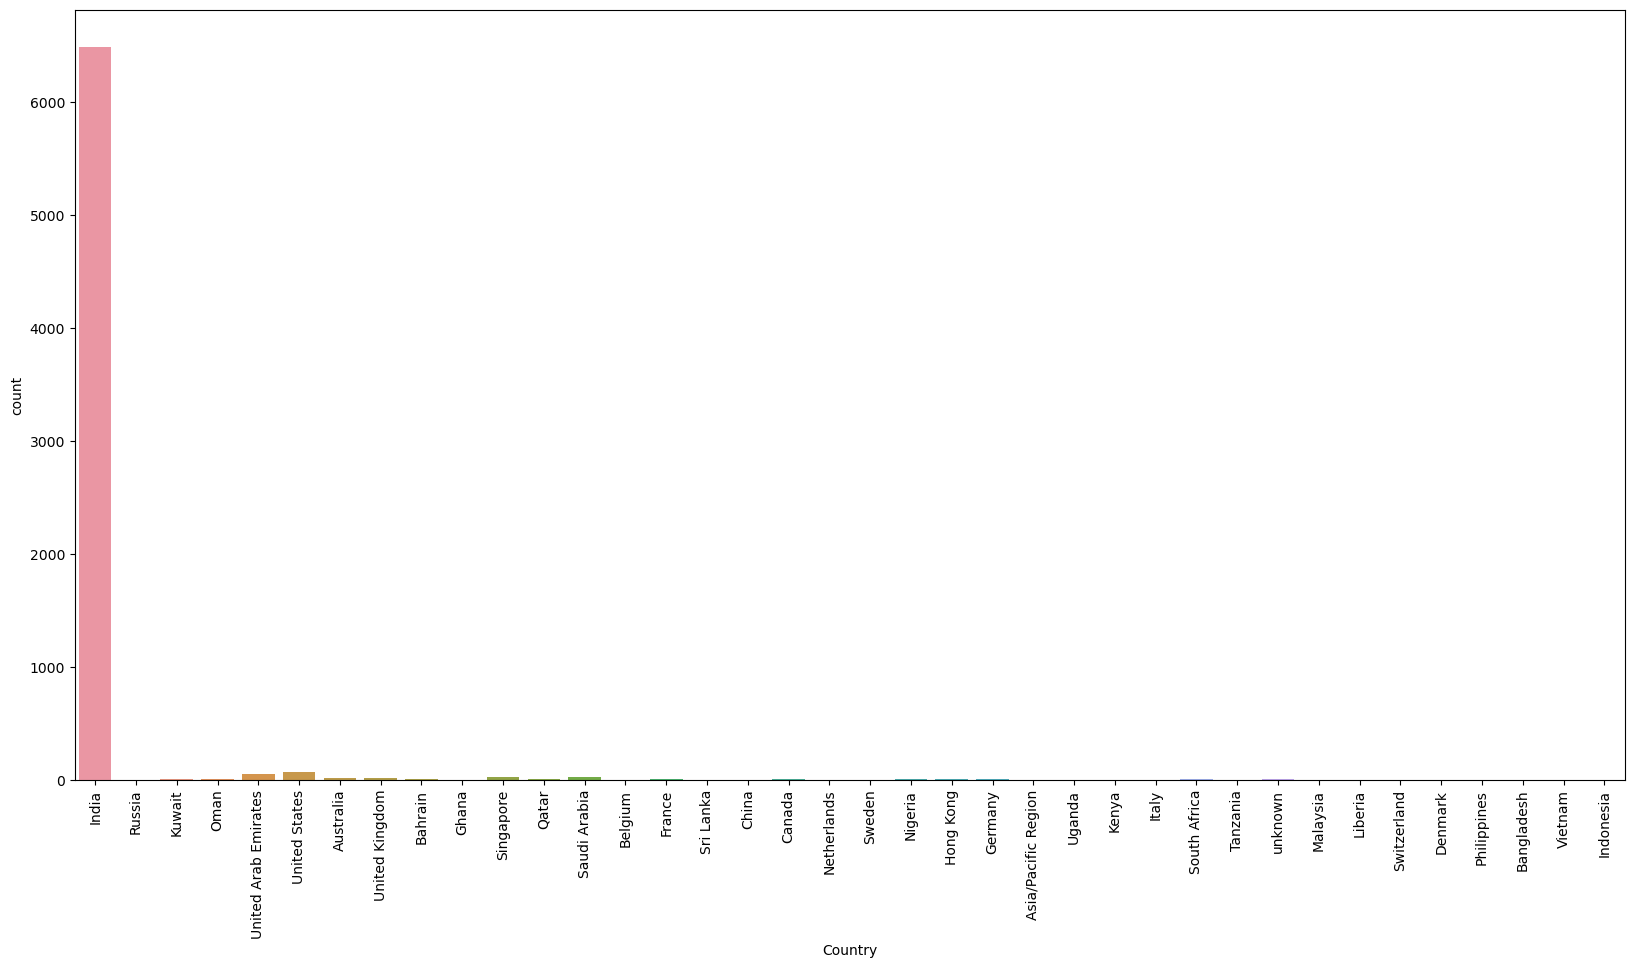

In [197]:
# Analysis of Country Column

plt.figure(figsize=(20,10))
sns.countplot(lead['Country'])
plt.xticks(rotation=90)

In [198]:
# Since most Values are India, Null Values can be imputed with India 
lead['Country']=lead['Country'].replace(np.nan,"India")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

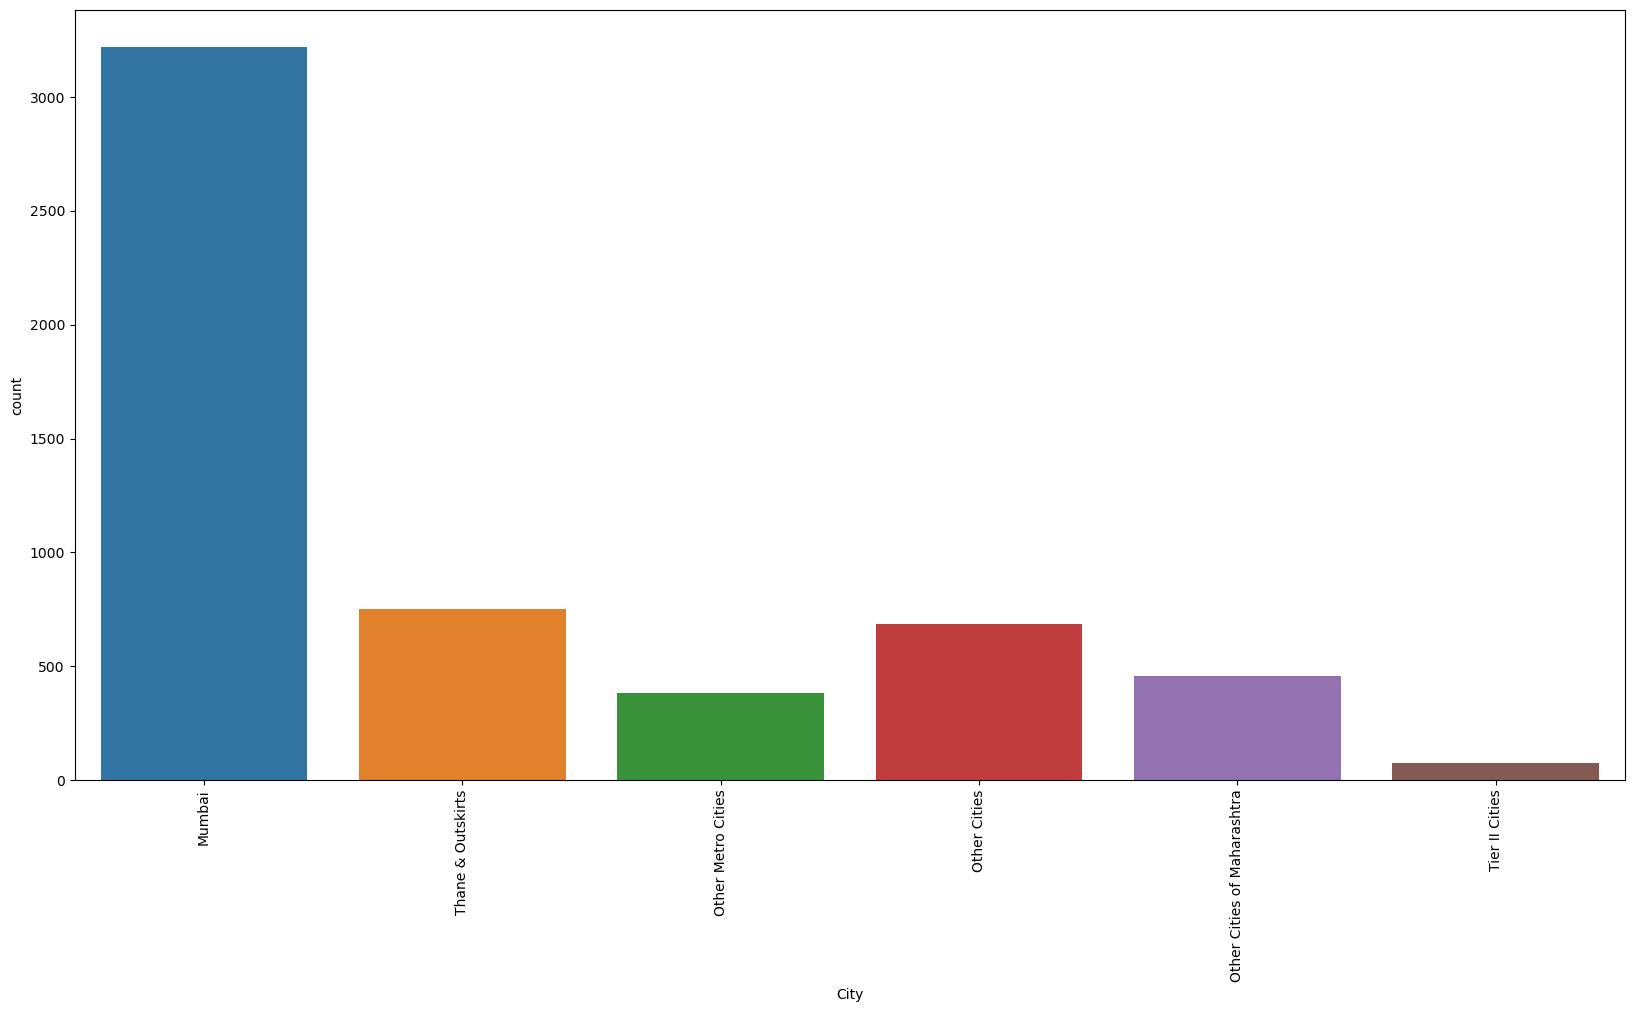

In [199]:
# Analysis of City column
plt.figure(figsize=(20,10))
sns.countplot(lead['City'])
plt.xticks(rotation=90)

In [200]:
lead['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [201]:
# Replacing Null Values with Mumbai in City Column
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [202]:
lead['City'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [203]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [204]:
# dropping remaining Null Value Column
lead.dropna(inplace=True)

In [205]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [206]:
# Converted is the Target Variable which indicates whether Lead has been converted or not
Conversion_rate= round(sum(lead['Converted'])/len(lead['Converted'].index),2)*100
Conversion_rate

38.0

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

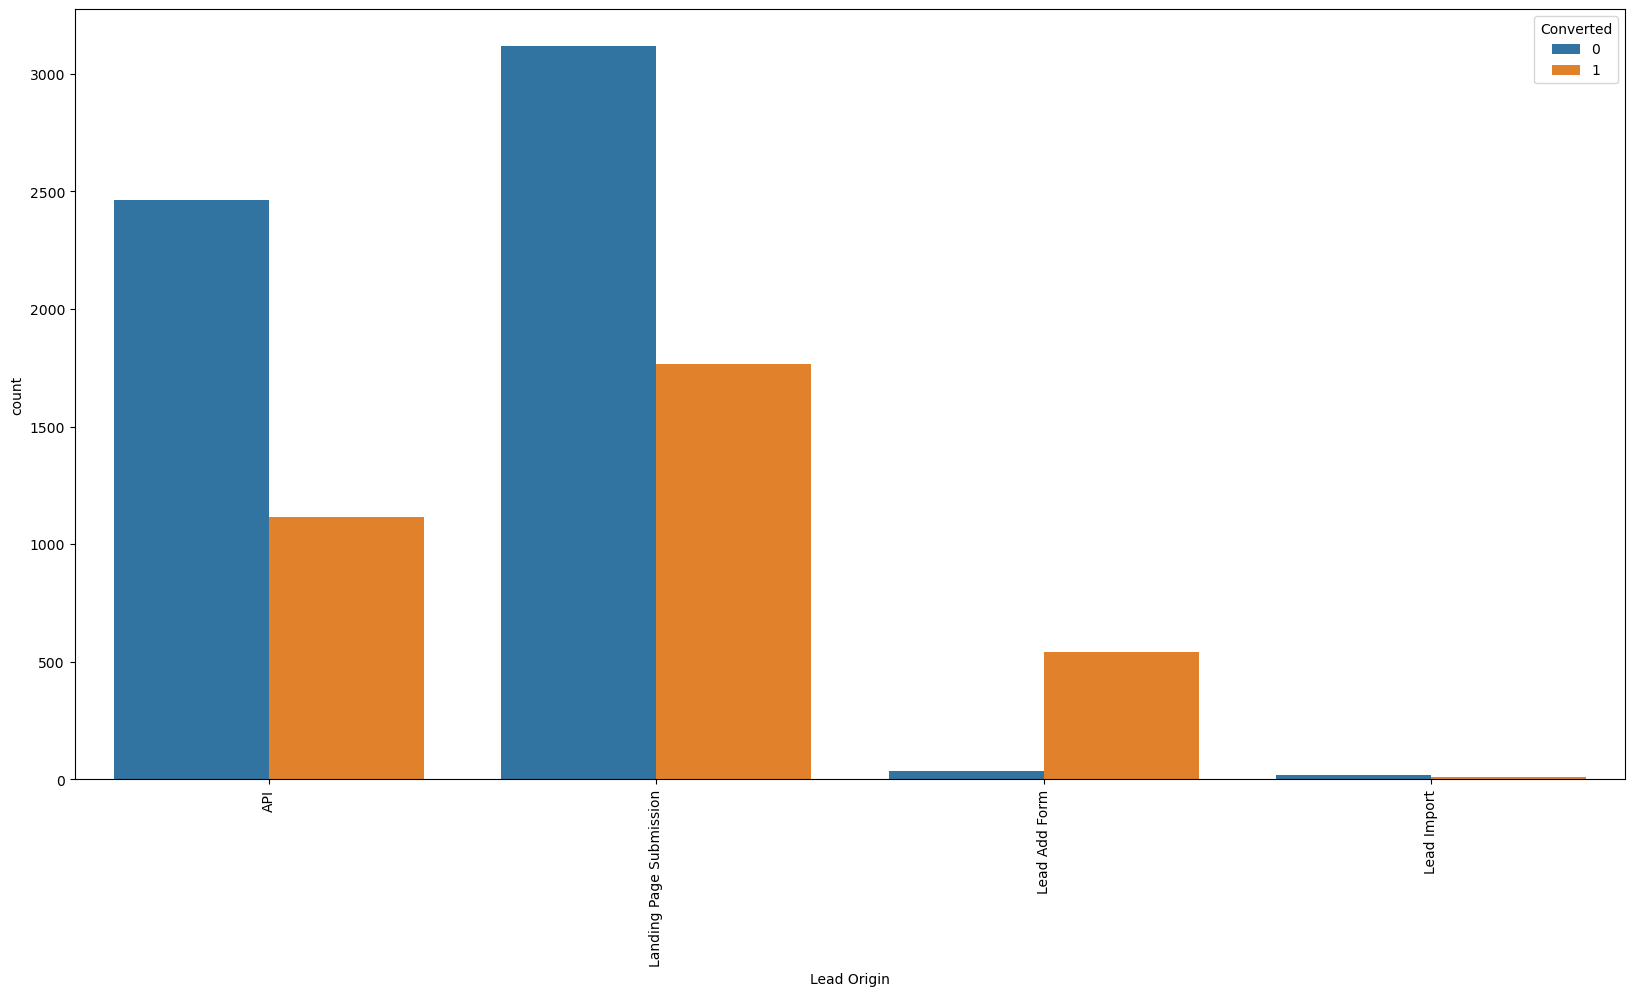

In [207]:
# Analysis of Lead Origin Column
plt.figure(figsize=(20,10))
sns.countplot(x='Lead Origin',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [208]:
# Lead Add Form has high Conversion Rate but Count is less for , Lead Import has very less count, API and Landing Page Submission has 30% Conversion Rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

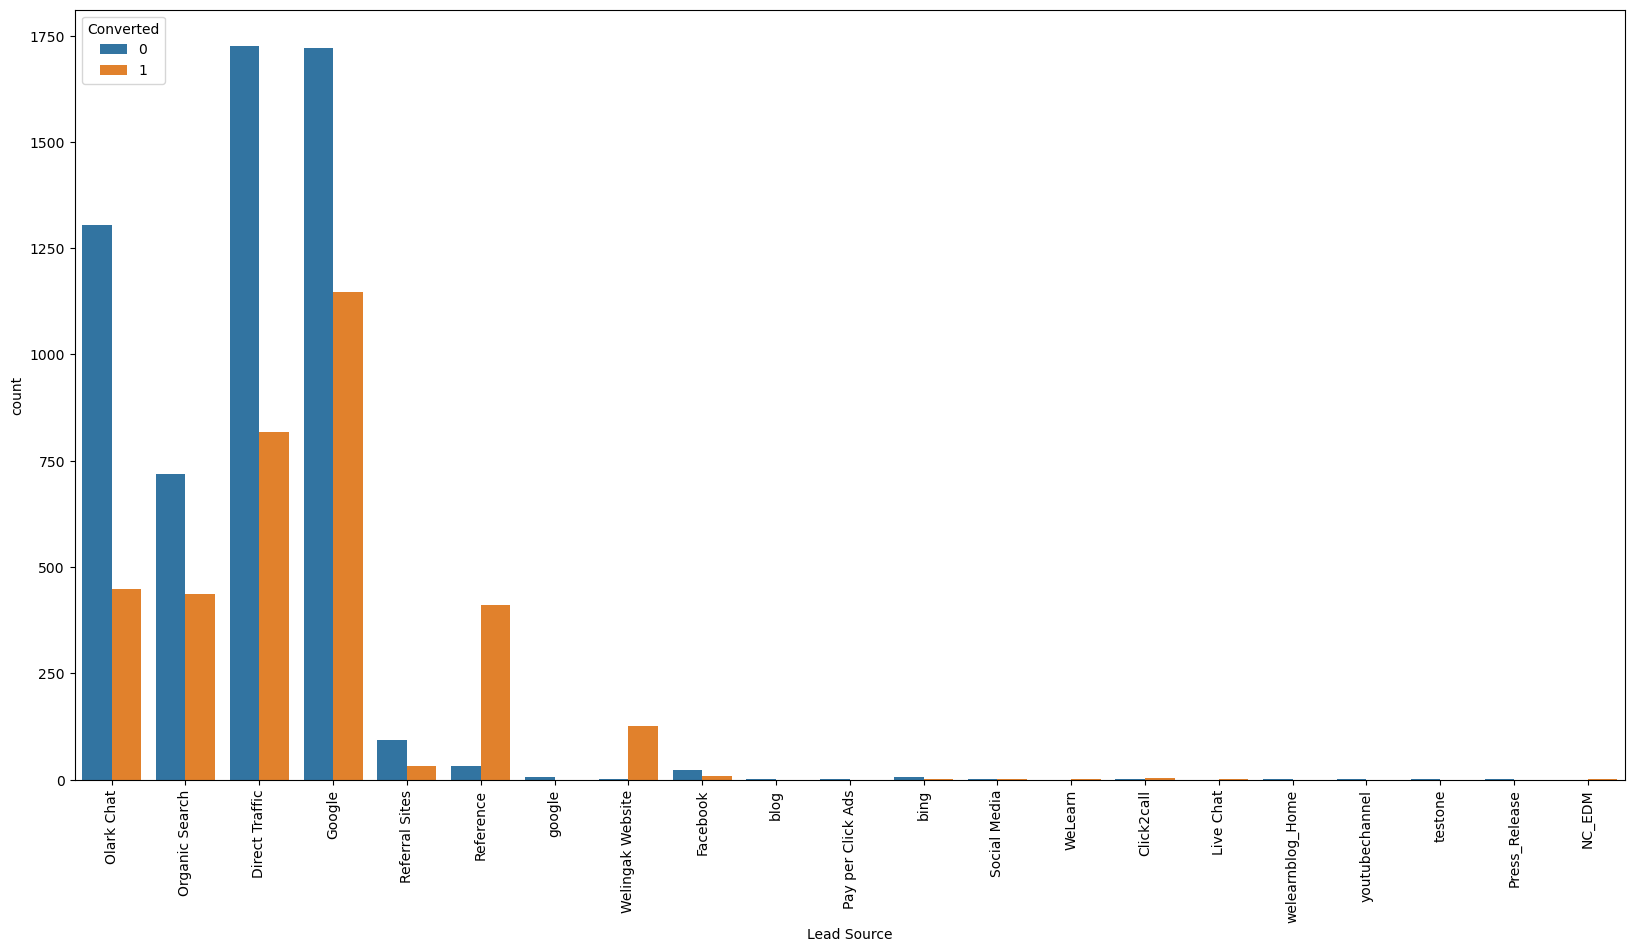

In [209]:
# Lead Source Column Analysis
plt.figure(figsize=(20,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [210]:
# Replace google with Google
lead['Lead Source']=lead['Lead Source'].replace('google','Google')

In [211]:
# Replacing Insignificant columns to the other Categories
lead['Lead Source']=lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'others')])

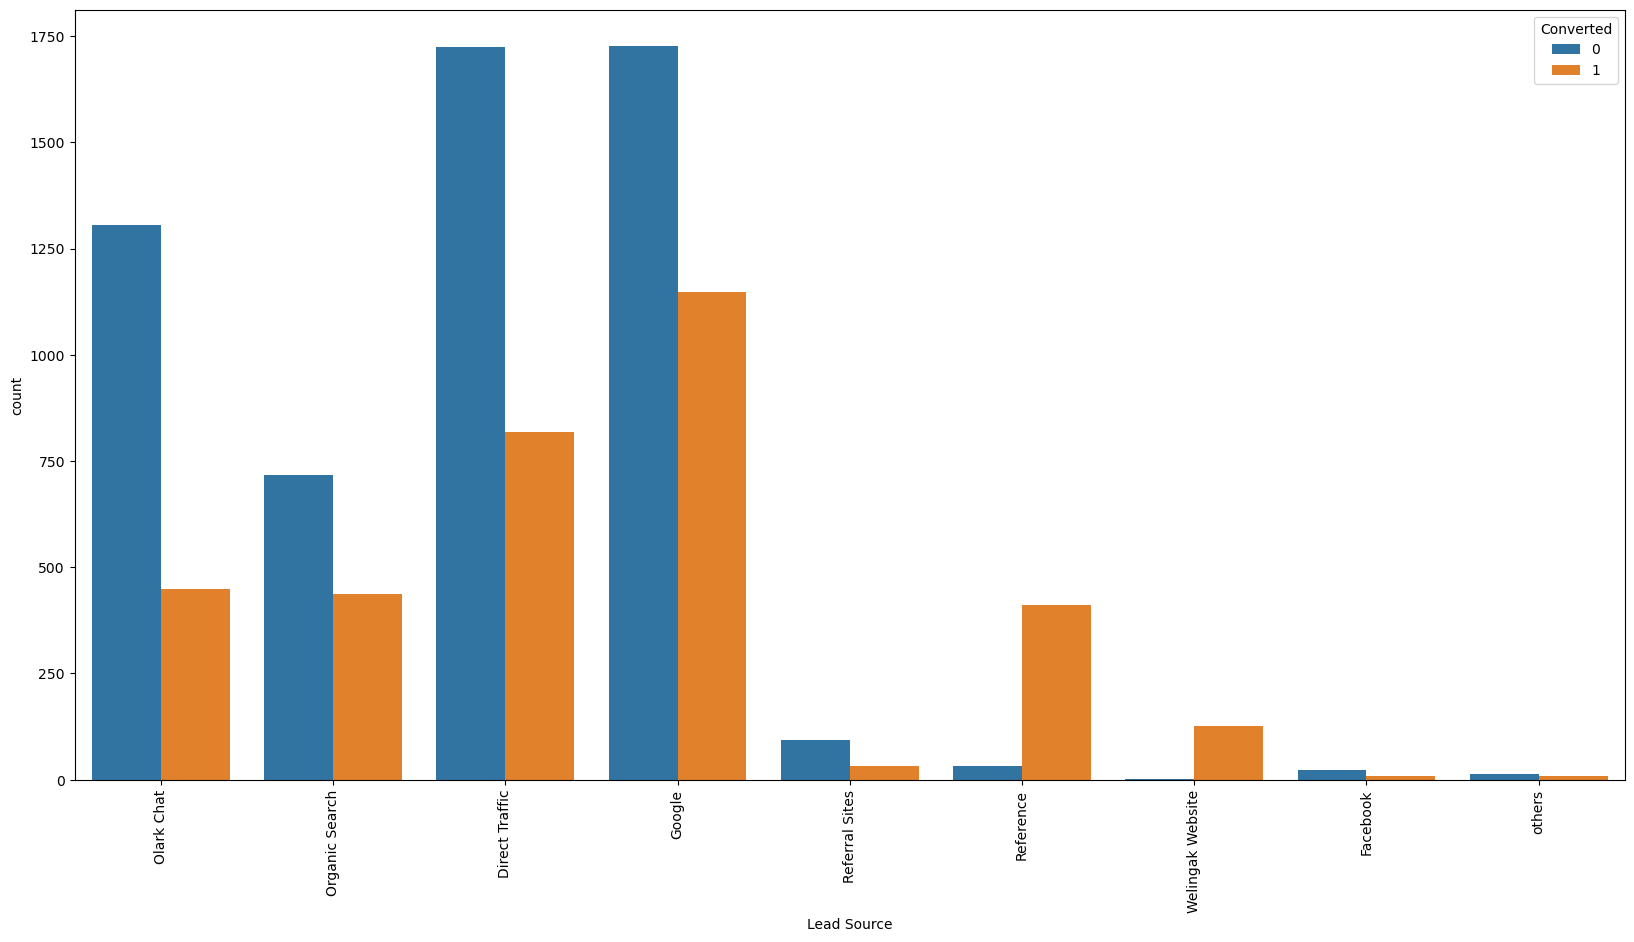

In [212]:
plt.figure(figsize=(20,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [213]:
# Google and Direct Traffic has maximum number of leads
# Conversion Rate of Reference and Welingak Website is High
# To improve overall Lead Conversion Rate olark chat,organic search,Direct traffic and google should be focused.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

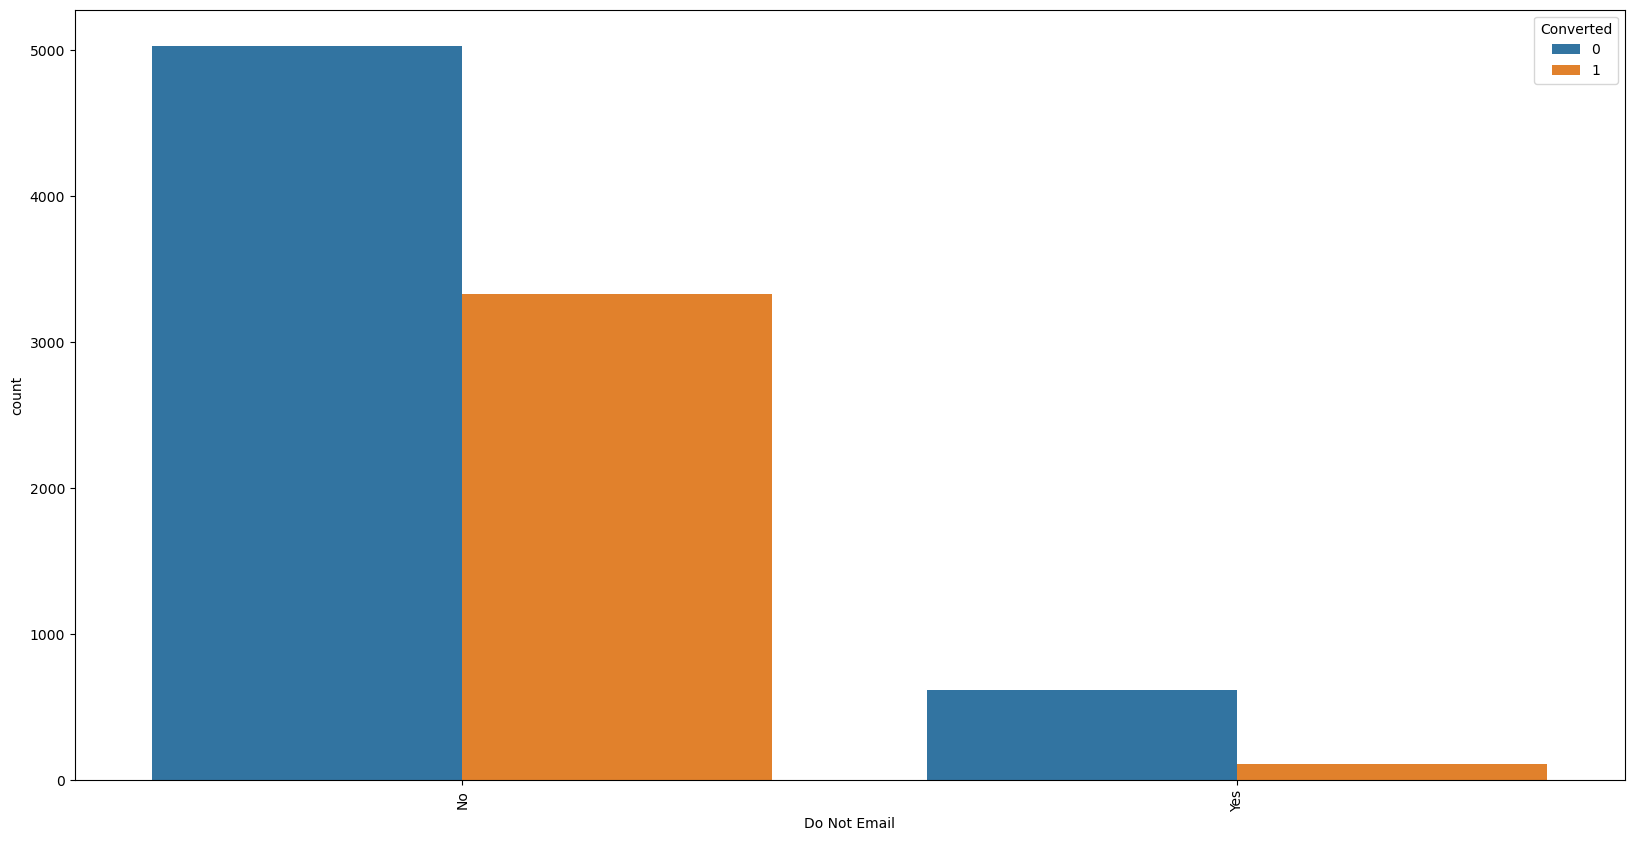

In [214]:
# Analysis of Do not Email Column
plt.figure(figsize=(20,10))
sns.countplot(x='Do Not Email',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [215]:
# Most Entries are no. No proper conclusion can be drawn from this column

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

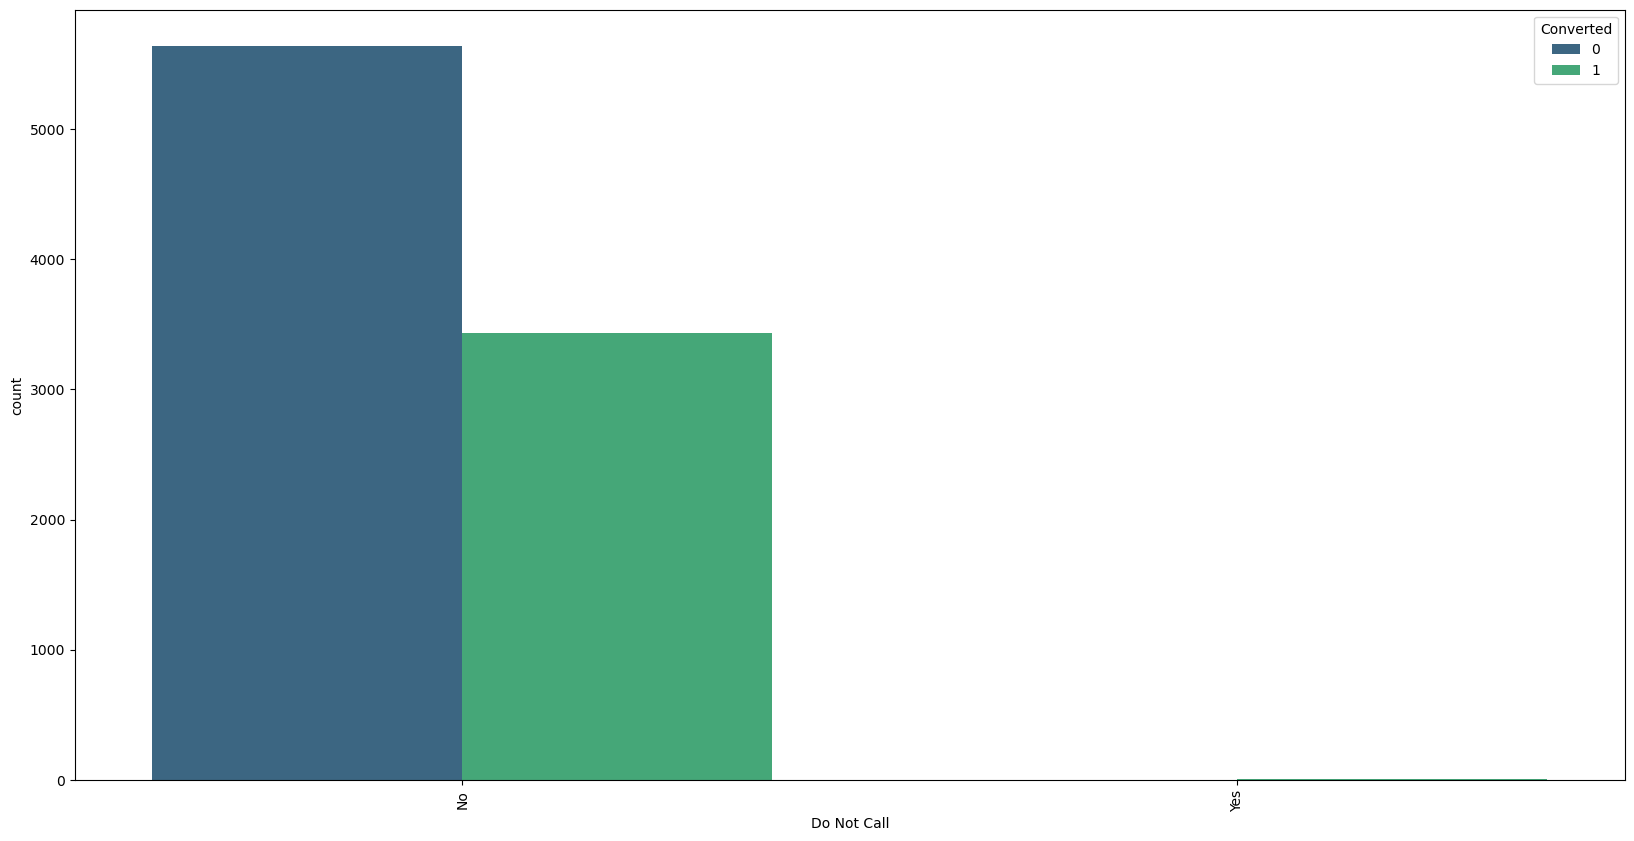

In [216]:
# Analysis of Do not Call Column
plt.figure(figsize=(20,10))
sns.countplot(x='Do Not Call',hue='Converted',data=lead,palette='viridis')
plt.xticks(rotation=90)

In [217]:
# Most entries are No. No Proper Inference can be drawn from Column

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

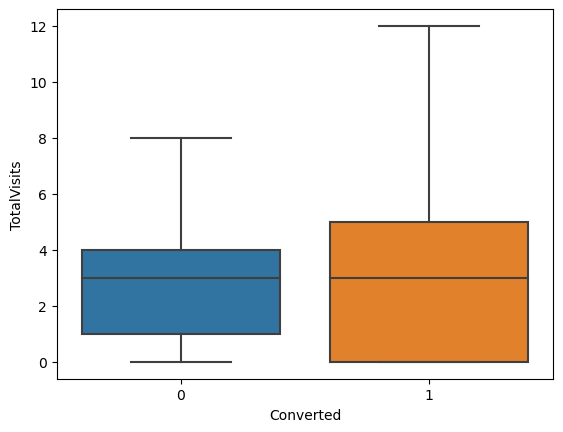

In [218]:
# Analysis of Total Visit Columns
sns.boxplot(y='TotalVisits',x='Converted',data=lead,showfliers=False)

In [219]:
# Median of total Visits is same for both converted and Not Converted. No Proper Inference can be drawn from the column.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

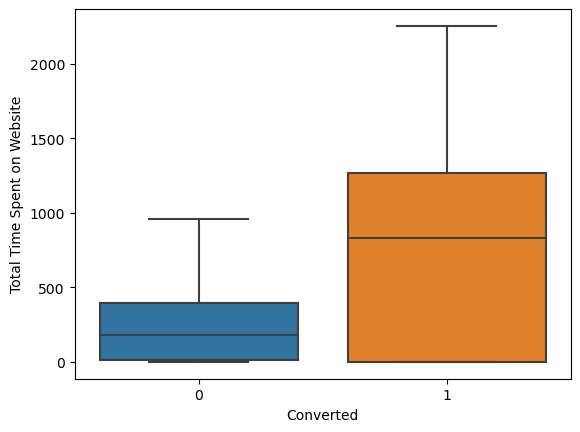

In [220]:
# Analysis of Total Time Spent on Website Column
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead,showfliers=False)

In [221]:
# More Time Spent on the Website Leads to Conversion Rate

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

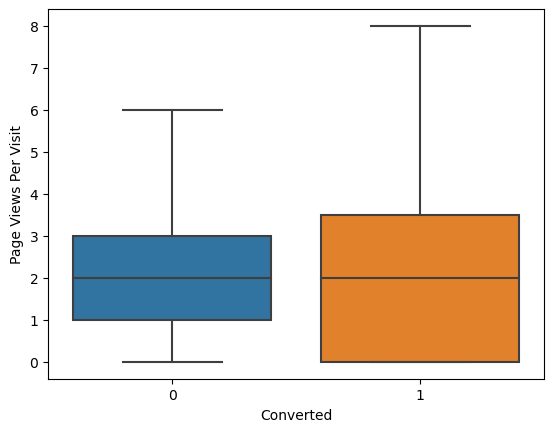

In [222]:
# Analysis of Page Views Per Visit Column
sns.boxplot(y='Page Views Per Visit',x='Converted',data=lead,showfliers=False)

In [223]:
# Median is Same for both Converted and Non Converted Rate. Nothing Specific Can be Concluded from the Column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

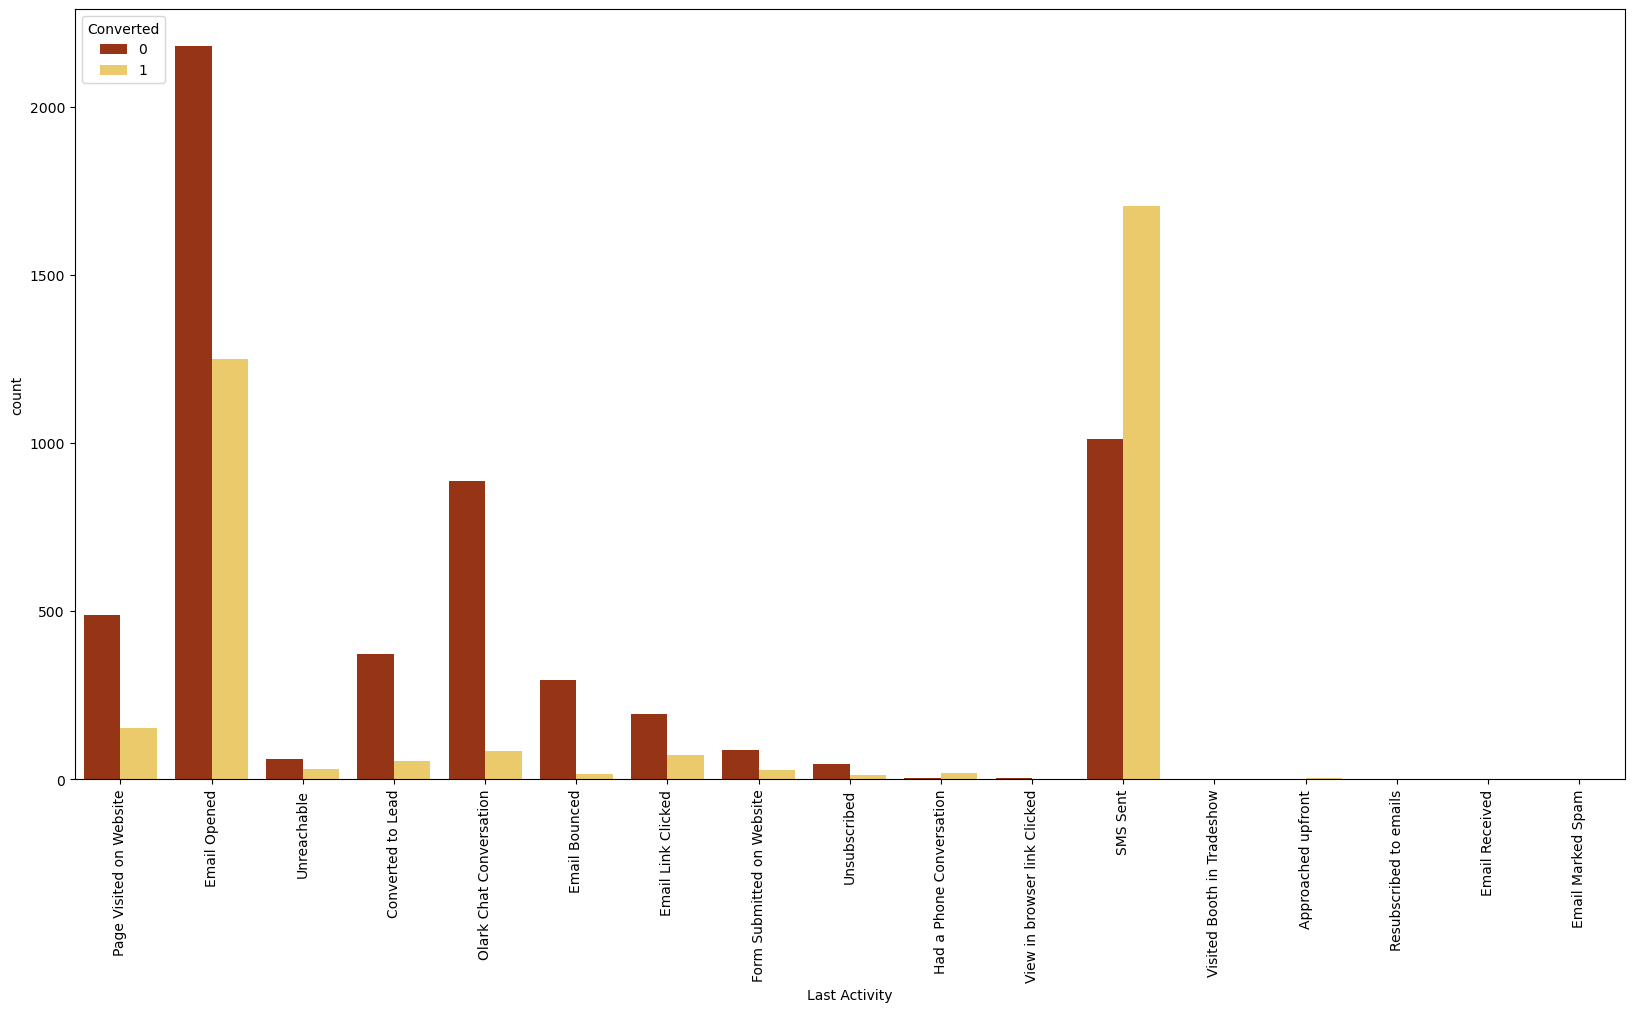

In [224]:
# Analysis of Last Activity Column
plt.figure(figsize=(20,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [225]:
# Putting Insignificant categories in the others Category:
lead['Last Activity']=lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Others'),
  Text(10, 0, 'SMS Sent')])

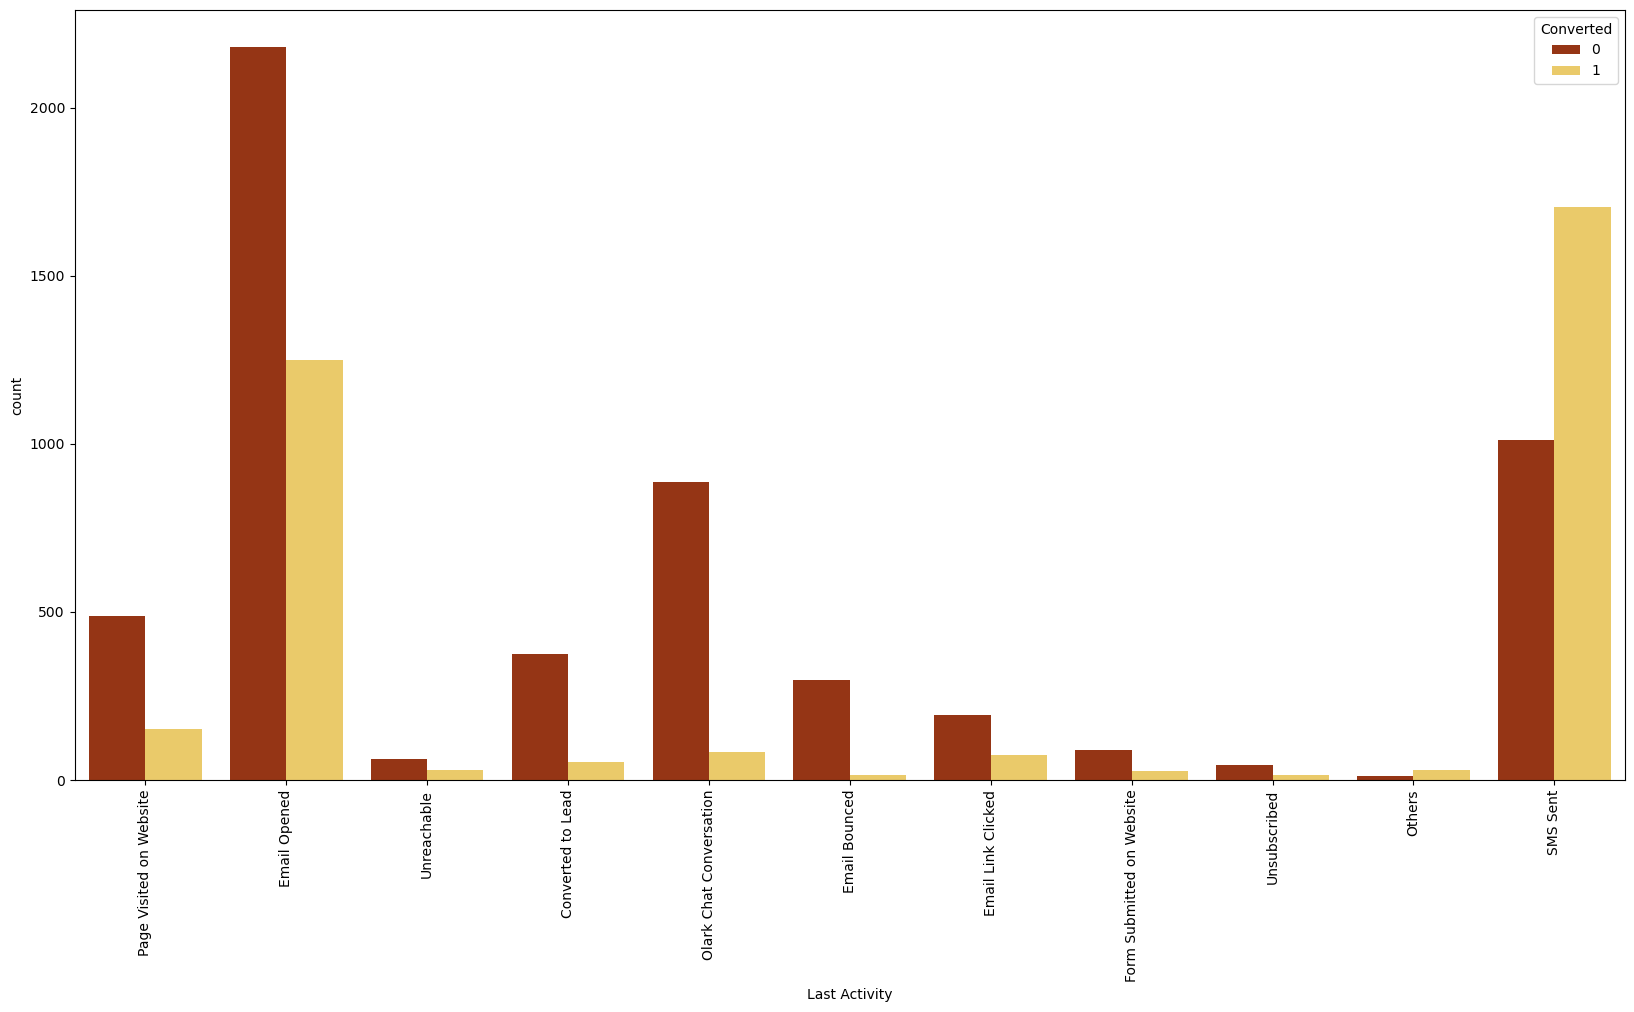

In [226]:
plt.figure(figsize=(20,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [227]:
# Most of the Leads have Email Opened as their Last Activity.
# SMS sent has good Conversion rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

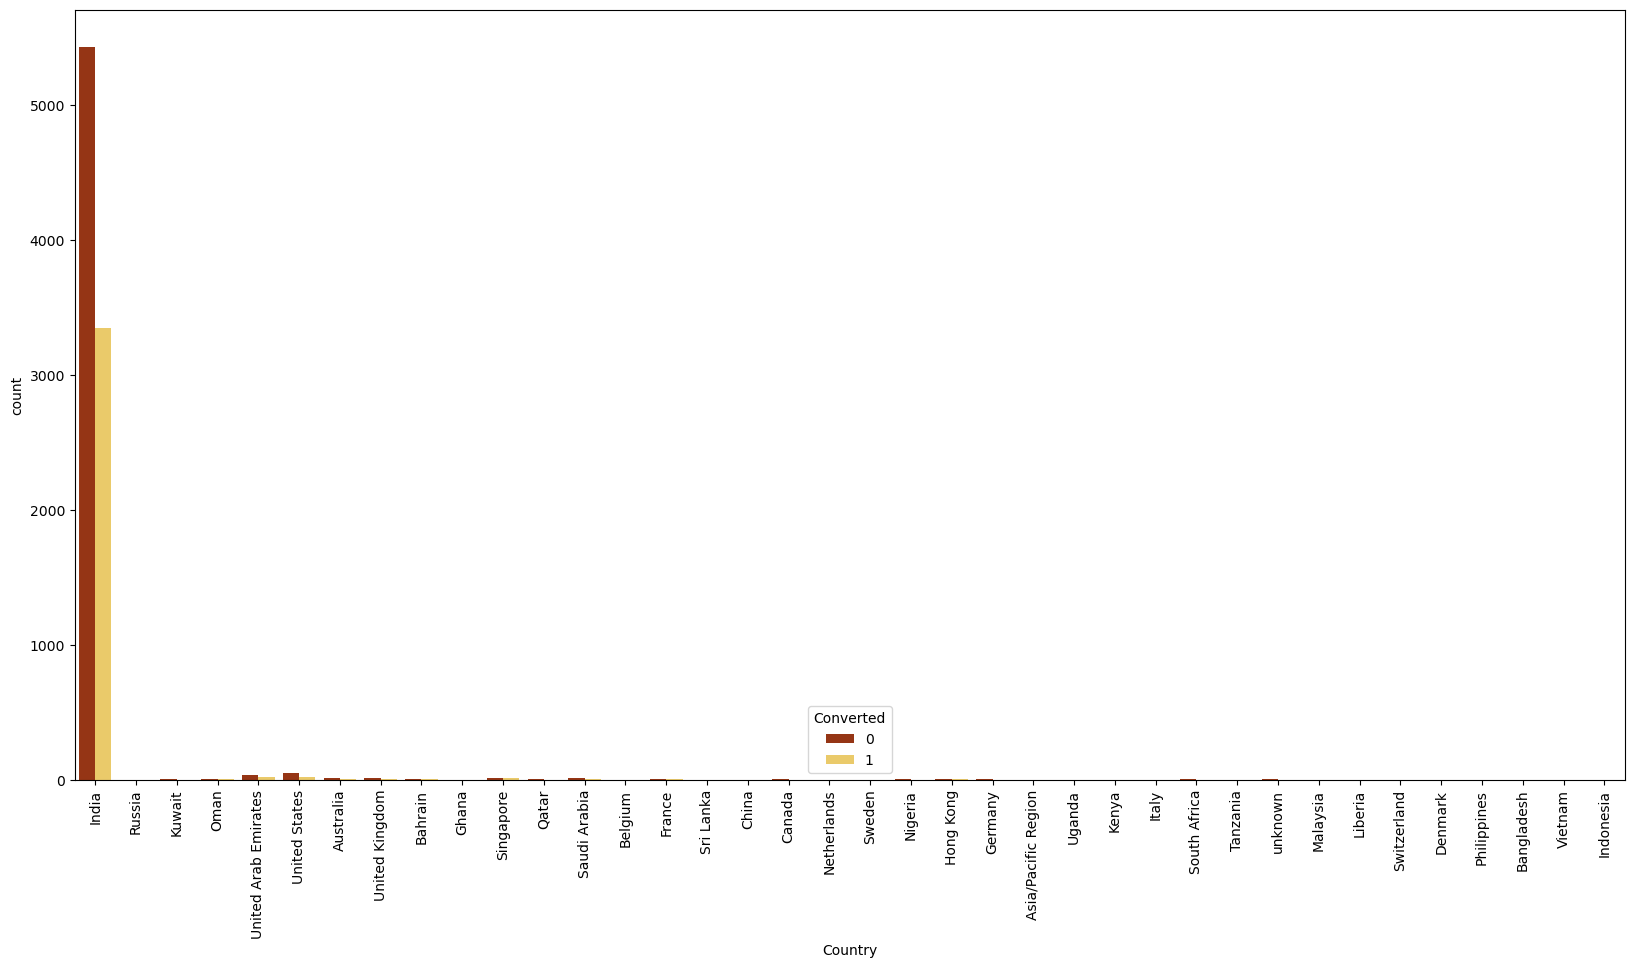

In [228]:
# Analysis of Country Column
plt.figure(figsize=(20,10))
sns.countplot(x='Country',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [229]:
# Most values are for India No Proper inference can be drawn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

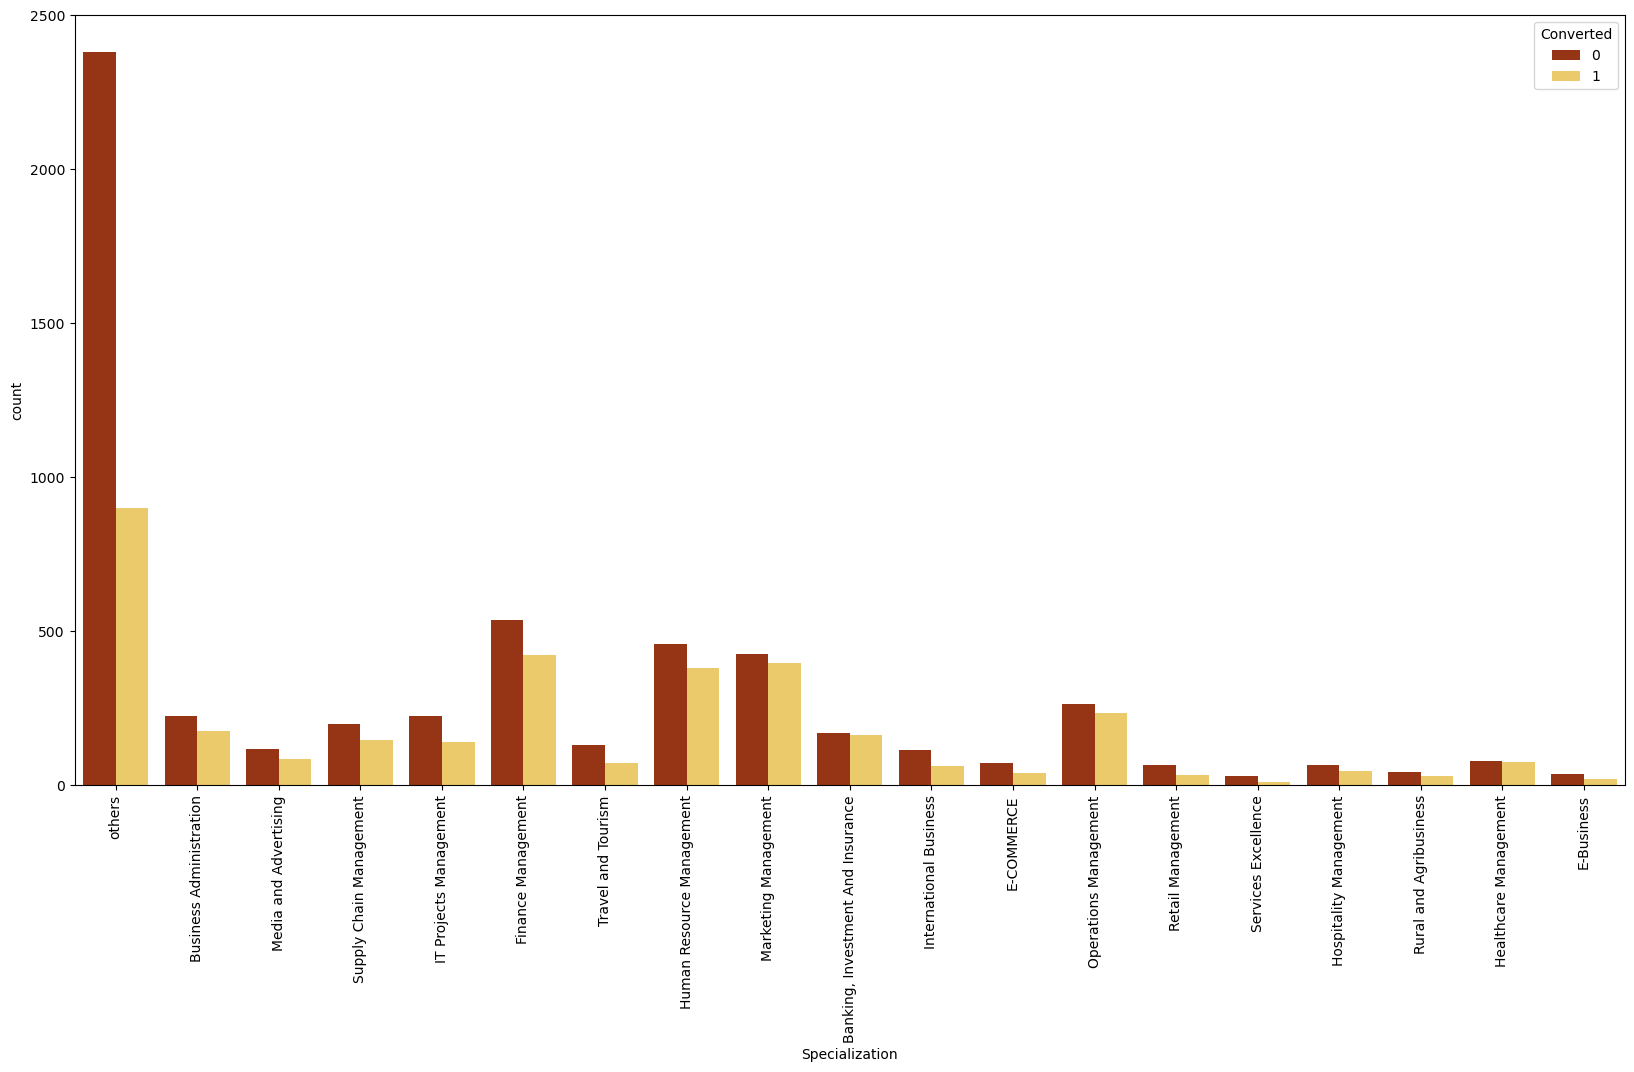

In [230]:
# Analysis of Specialization Column
plt.figure(figsize=(20,10))
sns.countplot(x='Specialization',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

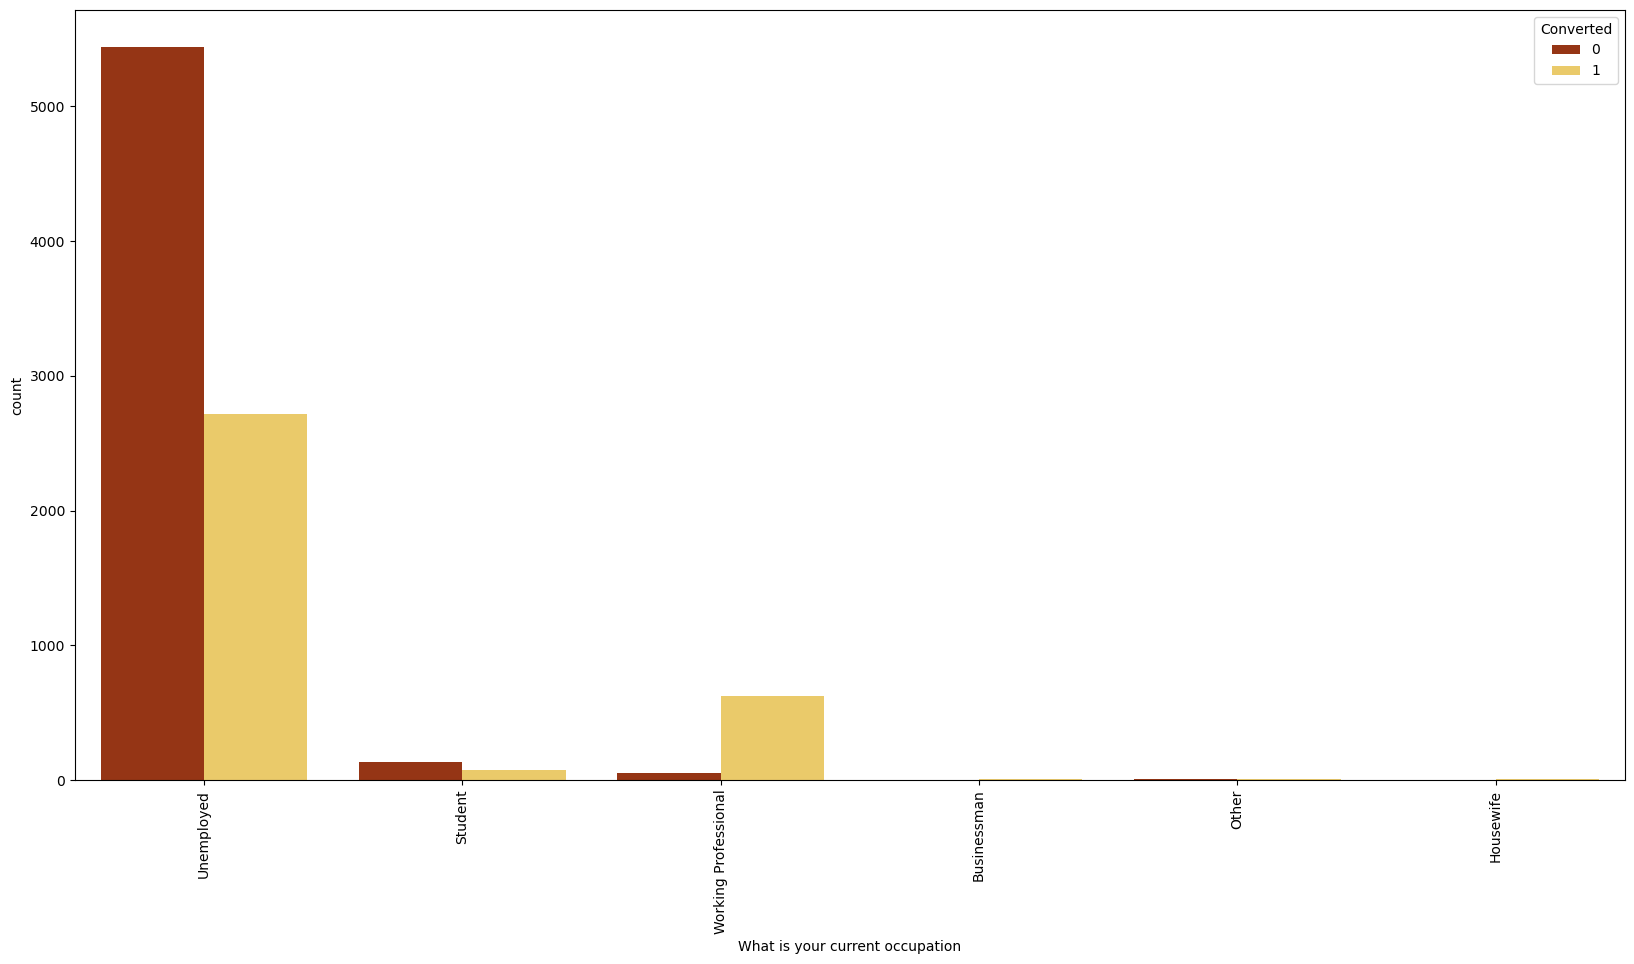

In [231]:
# Analysis of What is your current Occupation Column

plt.figure(figsize=(20,10))
sns.countplot(x='What is your current occupation',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [232]:
# Working Professional has high Conversion Rate

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

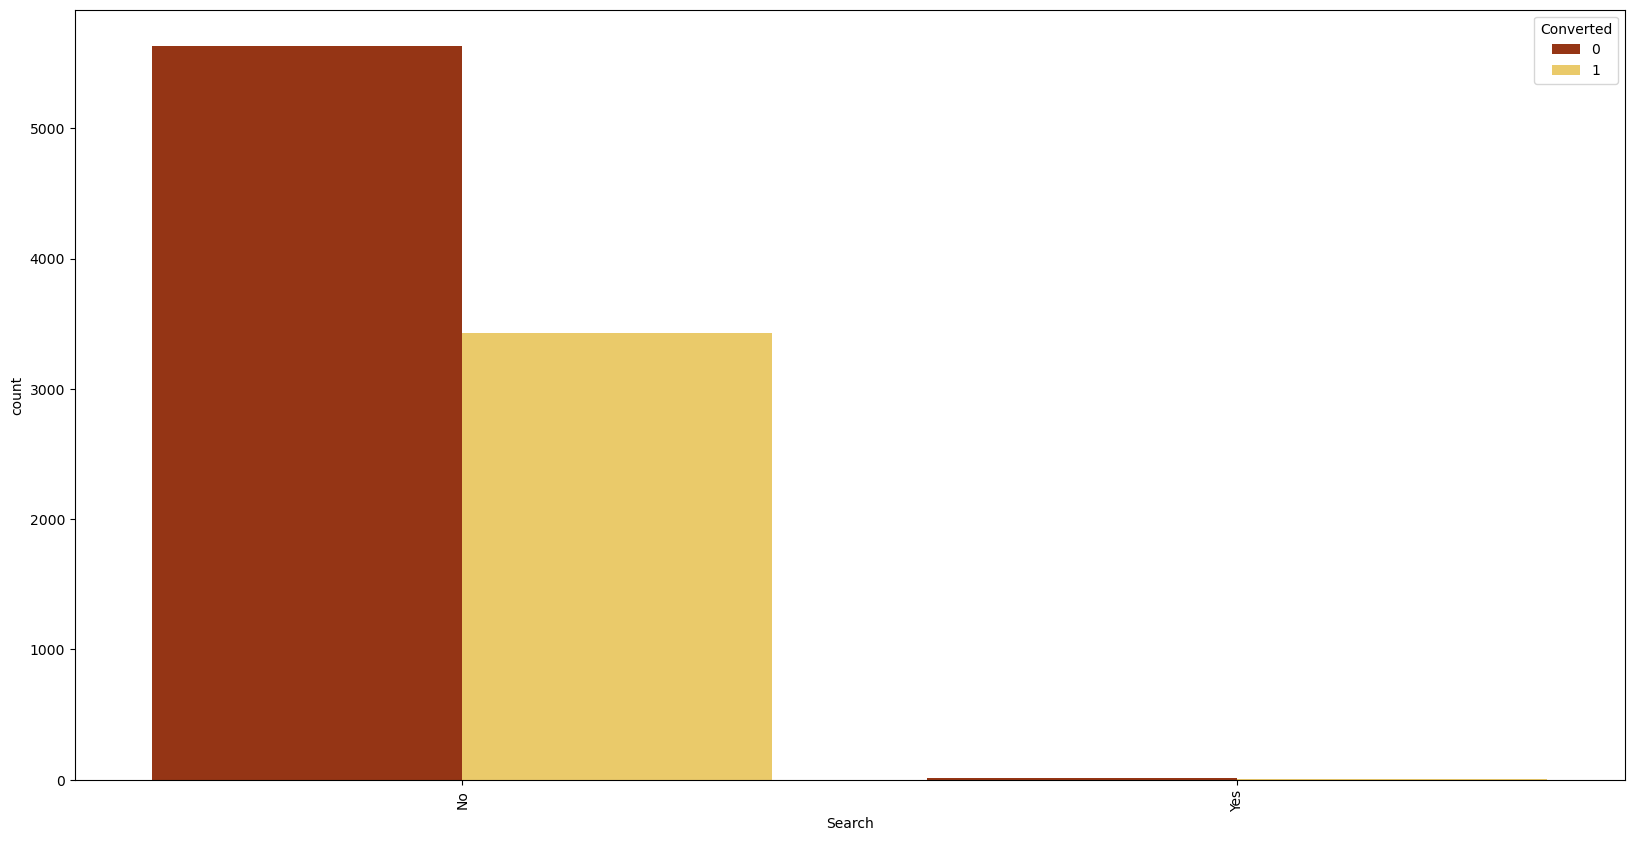

In [233]:
# Analysis of Search Column
plt.figure(figsize=(20,10))
sns.countplot(x='Search',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [234]:
# Most Entries are No So NO Proper Inference can be drawn from the Column

(array([0]), [Text(0, 0, 'No')])

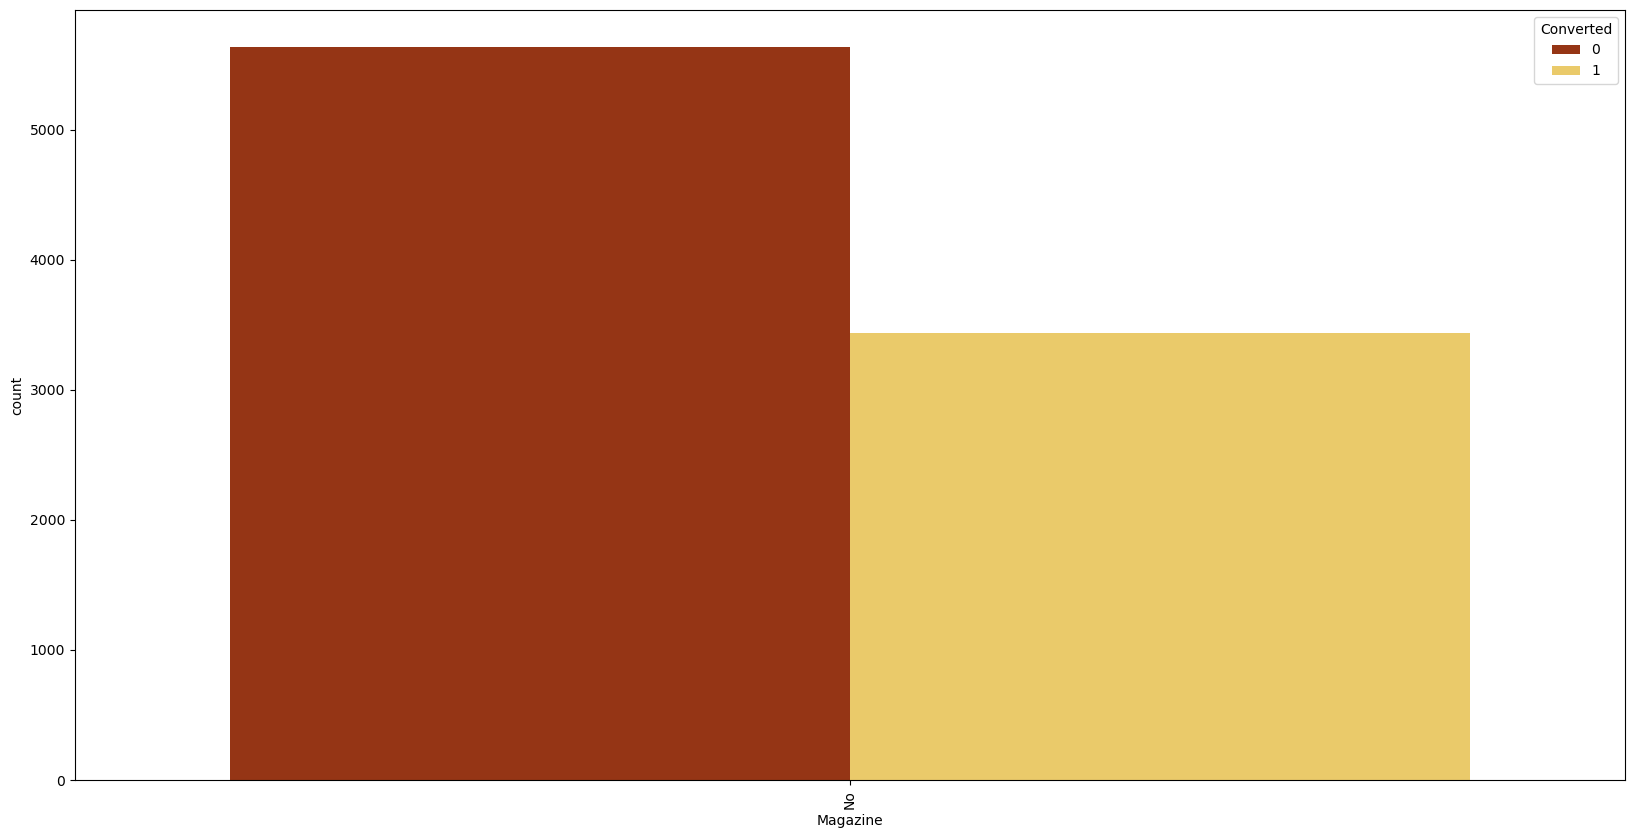

In [235]:
# Analysis of Magazine Column
plt.figure(figsize=(20,10))
sns.countplot(x='Magazine',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [236]:
# Most Entry are No So no Proper Inference Can be Drawn

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

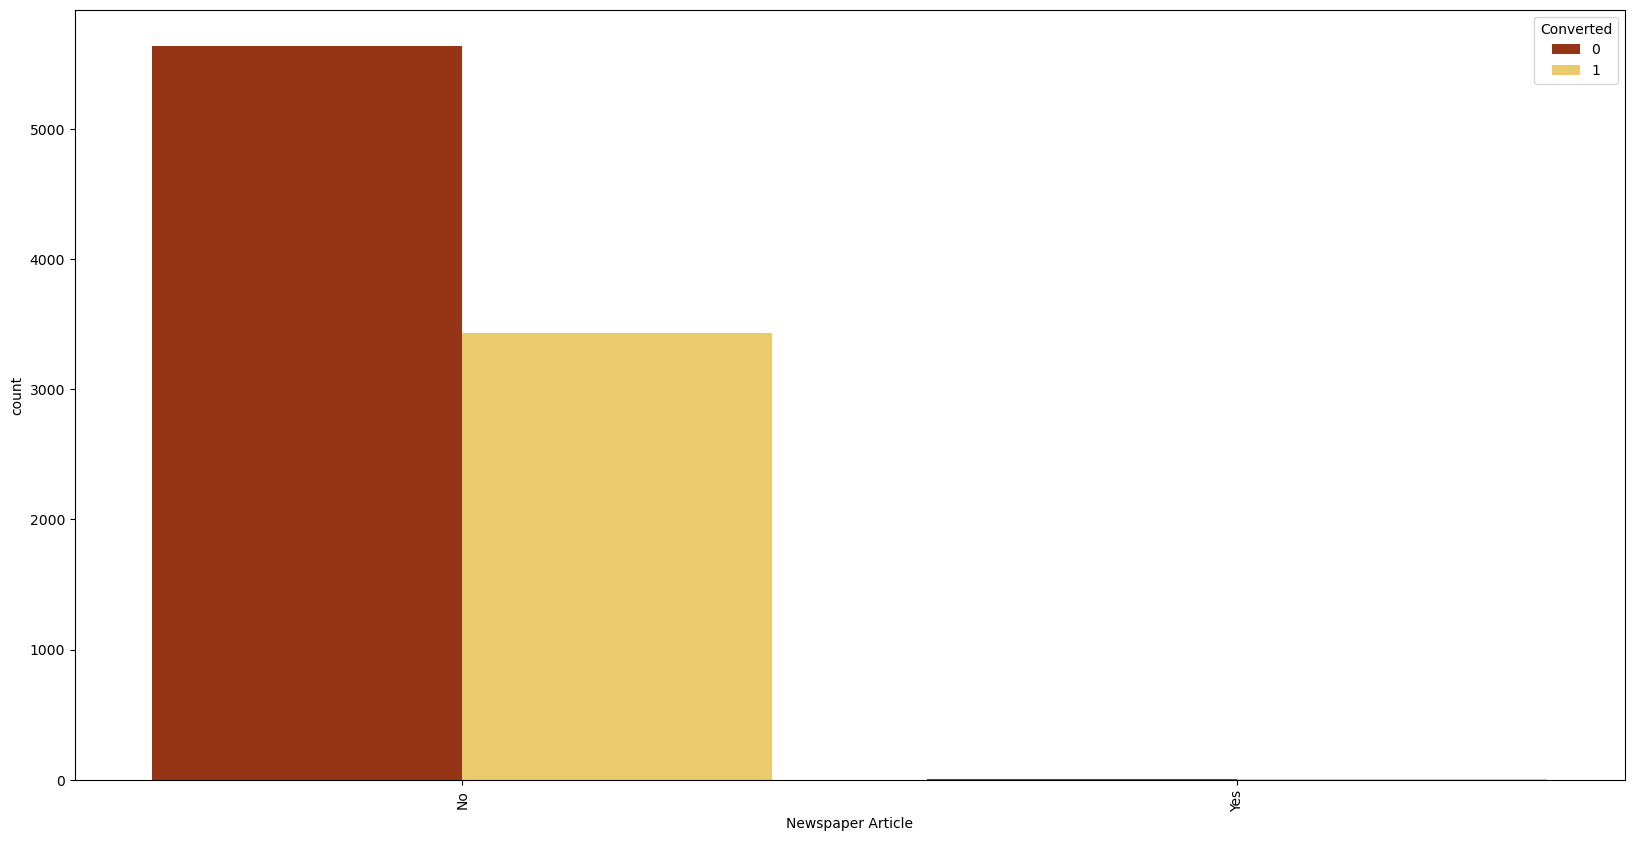

In [237]:
# Analysis of NewsPaper Article
plt.figure(figsize=(20,10))
sns.countplot(x='Newspaper Article',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [238]:
# Most entries are no So no Proper Inference can be drwan

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

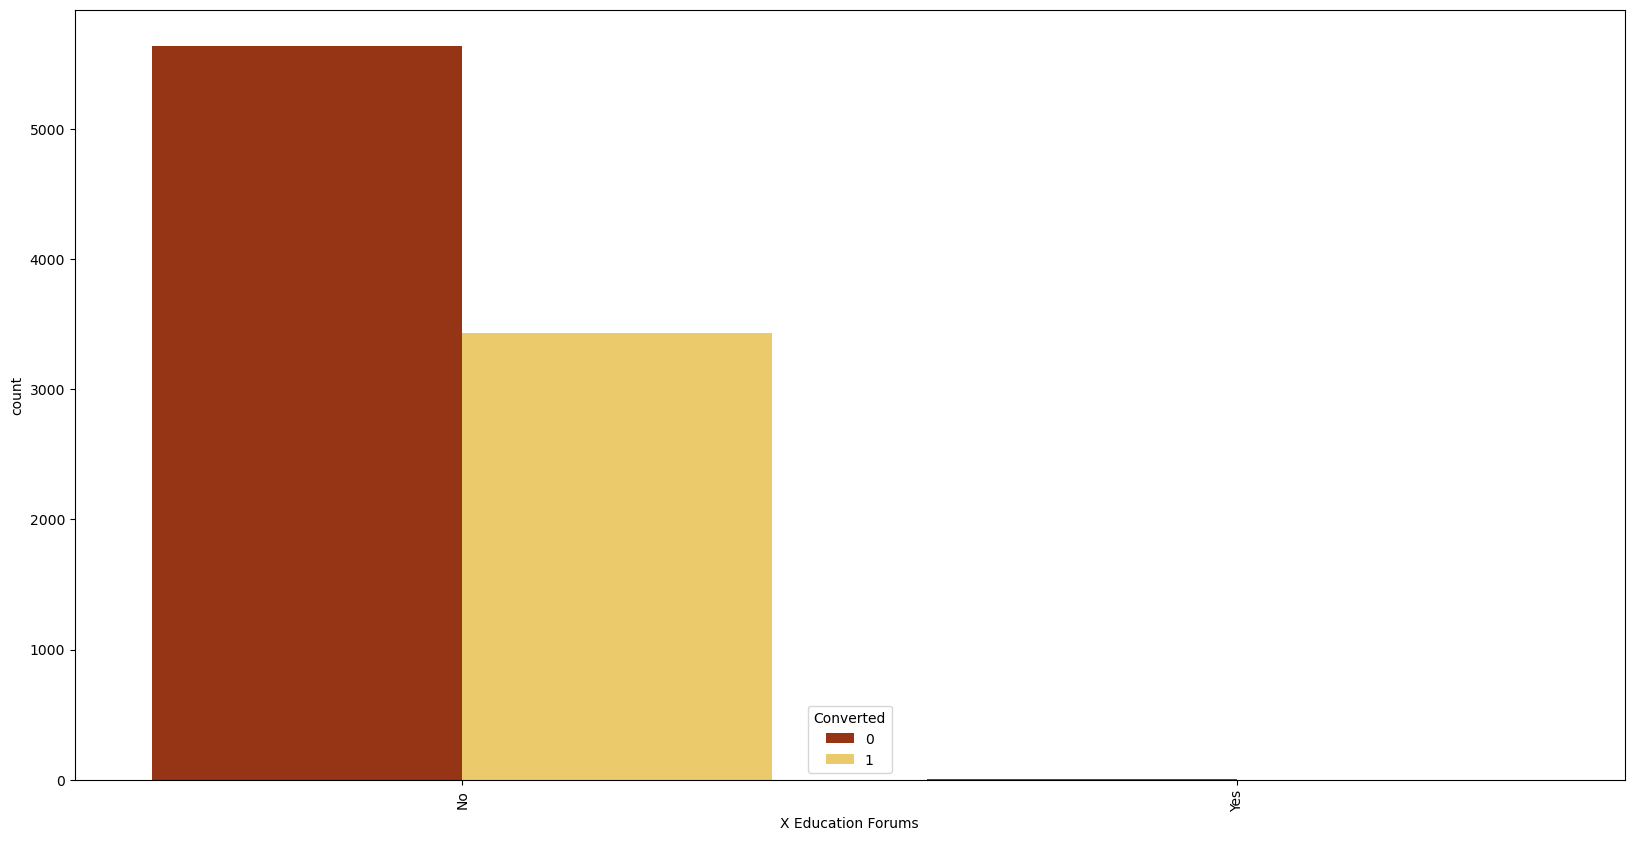

In [239]:
# Analysis of X Education Forums Column
plt.figure(figsize=(20,10))
sns.countplot(x='X Education Forums',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [240]:
# Most Entries are no so No Proper Inference Can be drawn from the Column.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

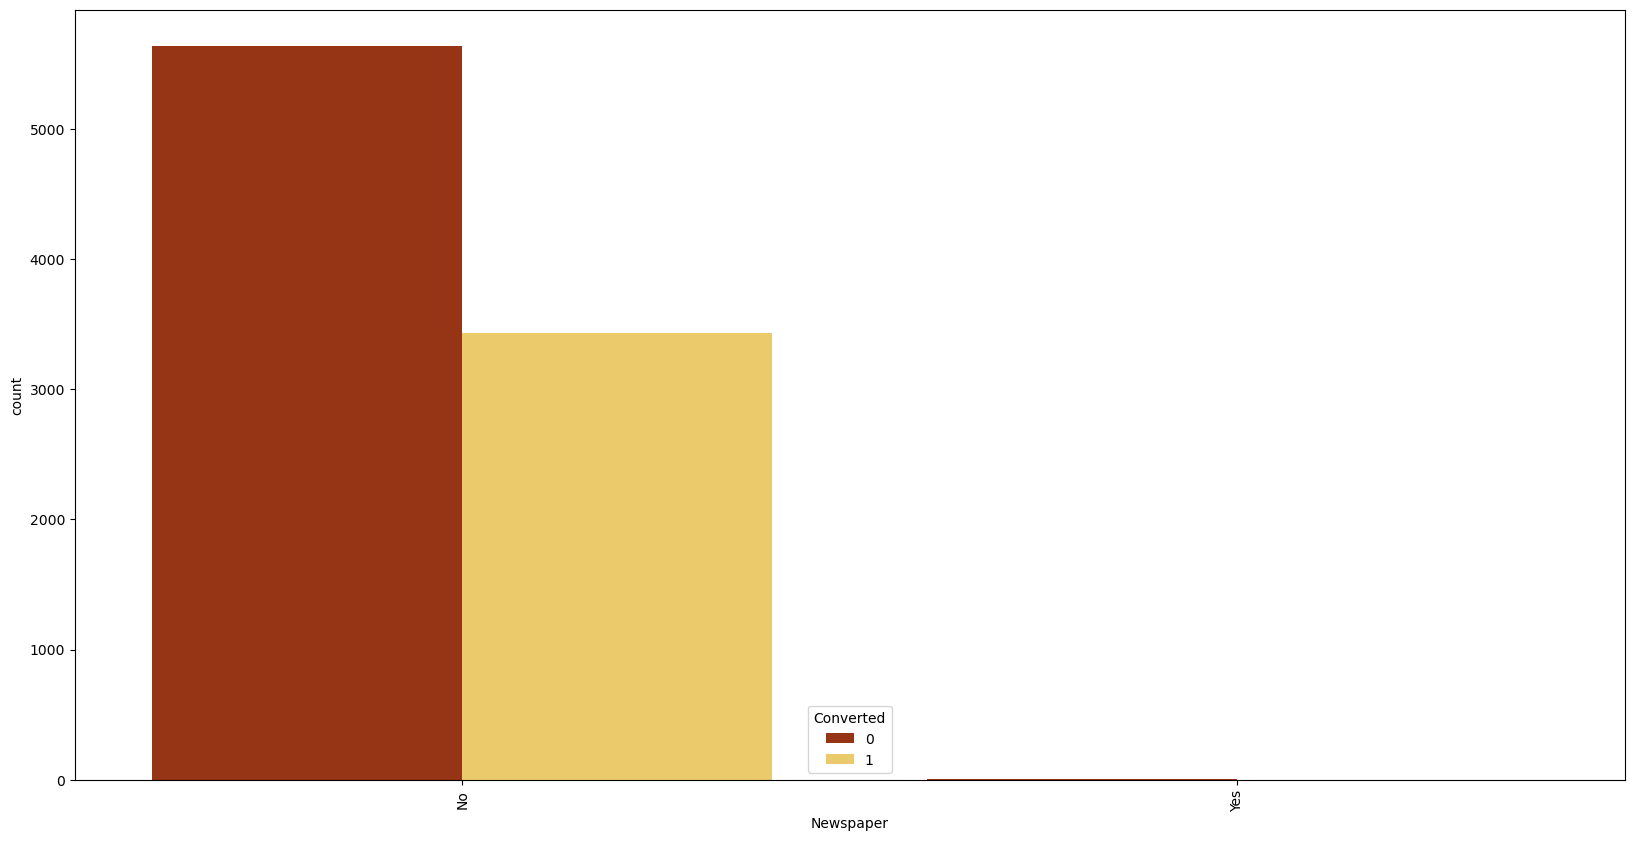

In [241]:
# Analysis of NewsPaper Column
plt.figure(figsize=(20,10))
sns.countplot(x='Newspaper',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [242]:
# most entries are No. So No Proper Inference can be drawn from this column.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

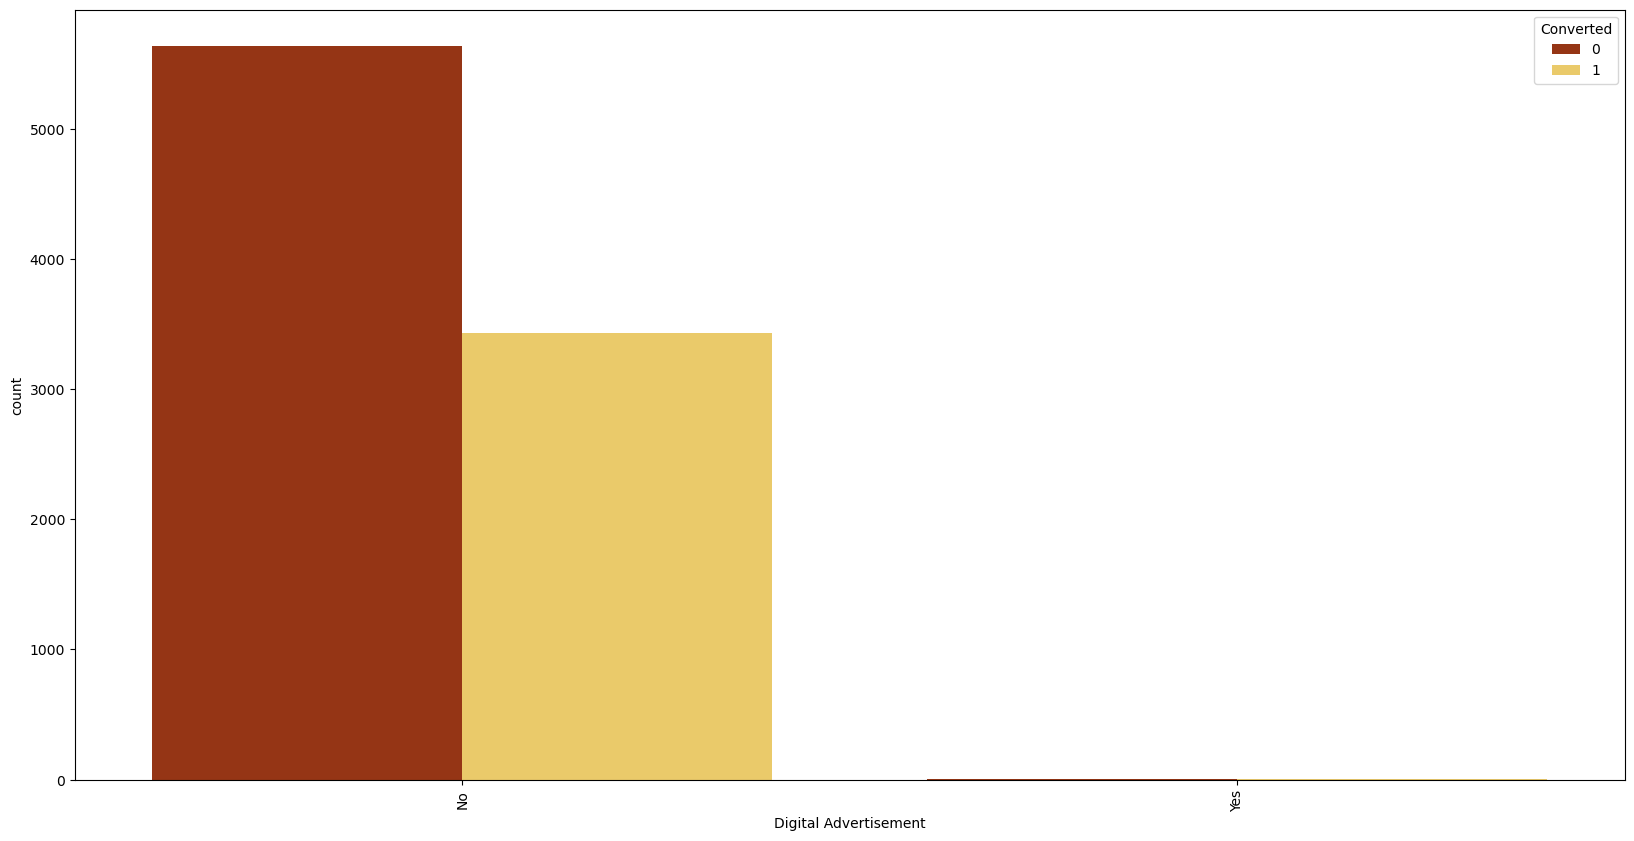

In [243]:
# Analysis of Digital Advertisment Column

plt.figure(figsize=(20,10))
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [244]:
# Most of the entries are No so NO proper inference can be drawn from the column,

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

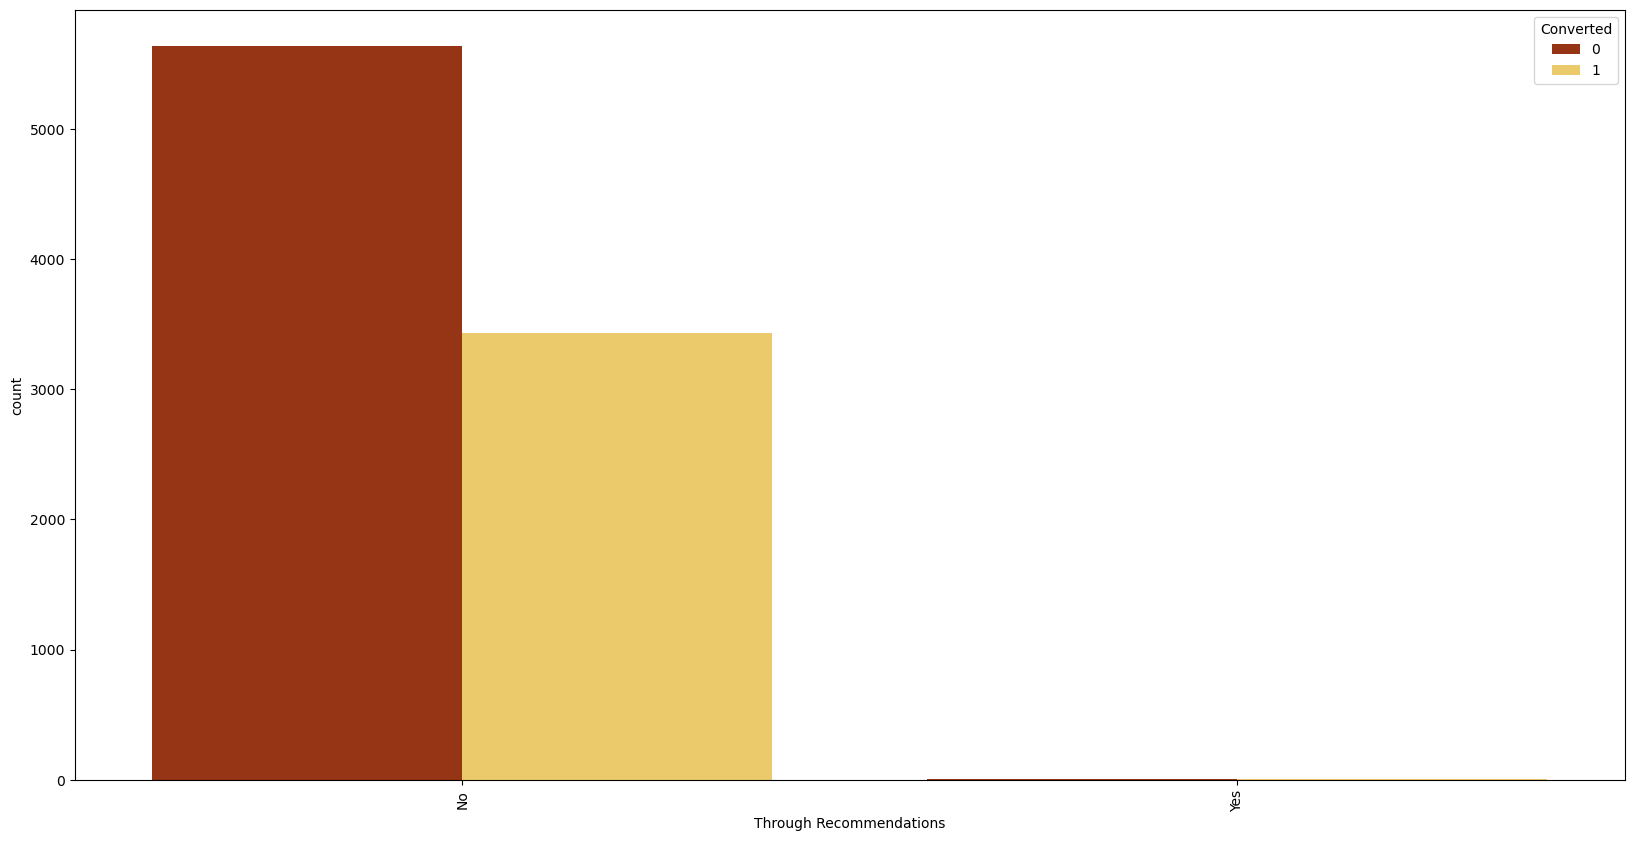

In [245]:
# Analysis of Through Recommendations
plt.figure(figsize=(20,10))
sns.countplot(x='Through Recommendations',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [246]:
# Most of the entries are no so no Proper Inference can be drawn from the column.

(array([0]), [Text(0, 0, 'No')])

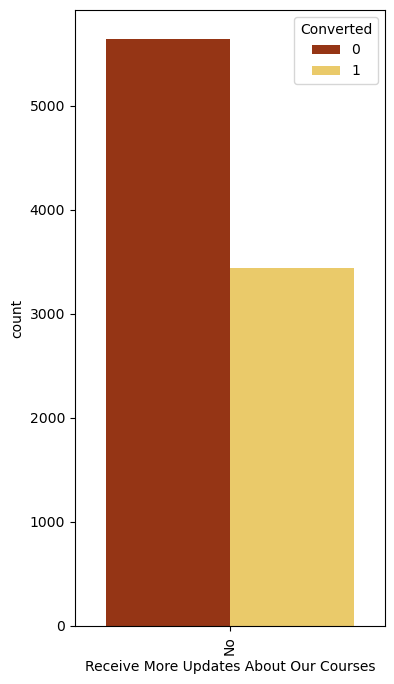

In [247]:
# Analysis of Receive More Updates About Our Courses column:
plt.figure(figsize=(4,8))
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [248]:
#most of the entries are no so no proper inference can be drawn from column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Will revert after reading the email '),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Closed by Horizzon'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22, 0,

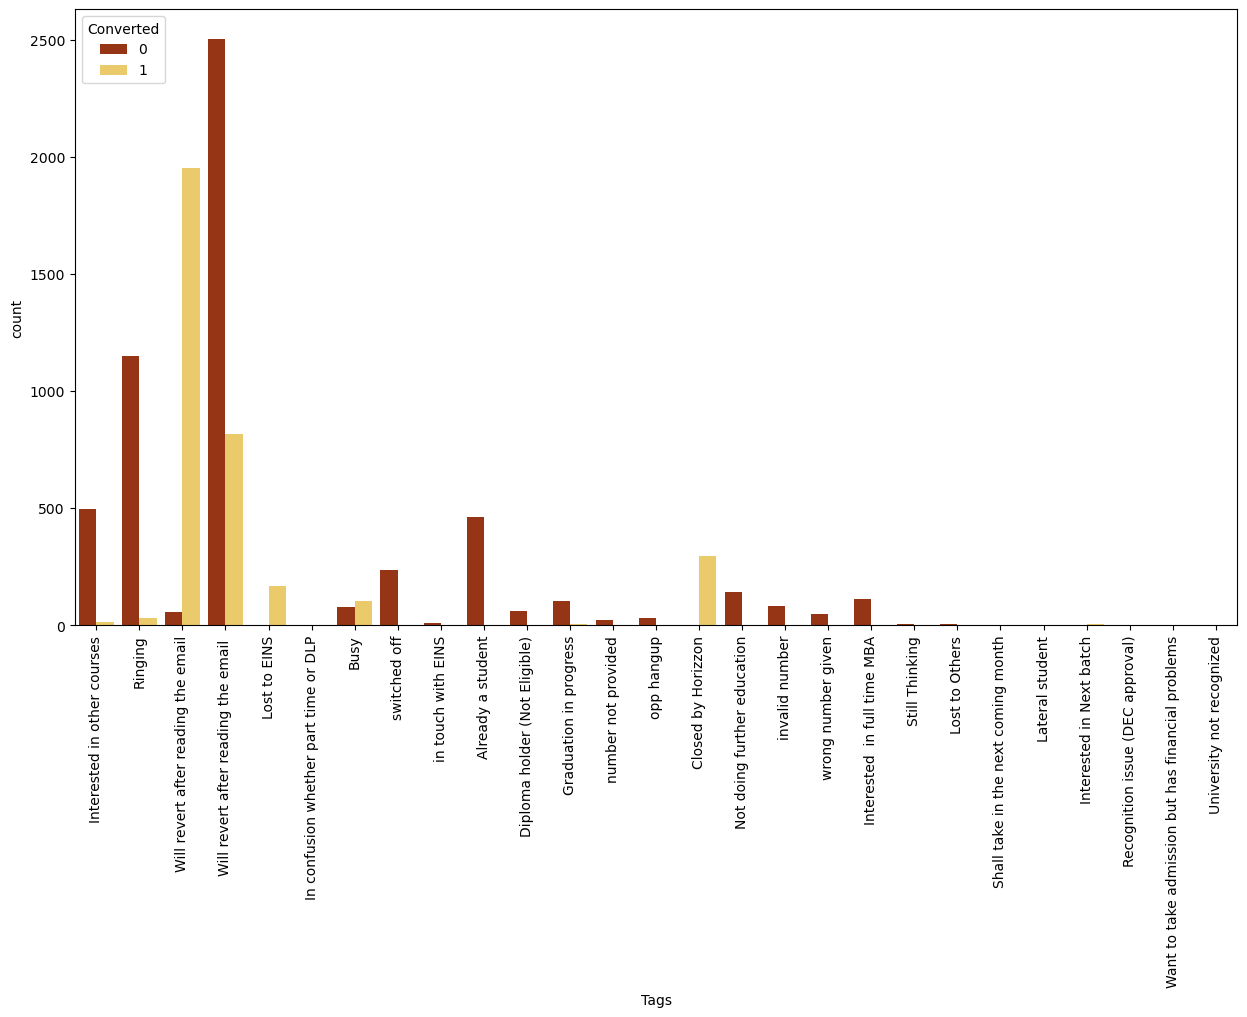

In [249]:
# Analysis of Tags Column
plt.figure(figsize=(15,8))
sns.countplot(x='Tags',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [250]:
# This column is not of much use for Analysis

(array([0]), [Text(0, 0, 'No')])

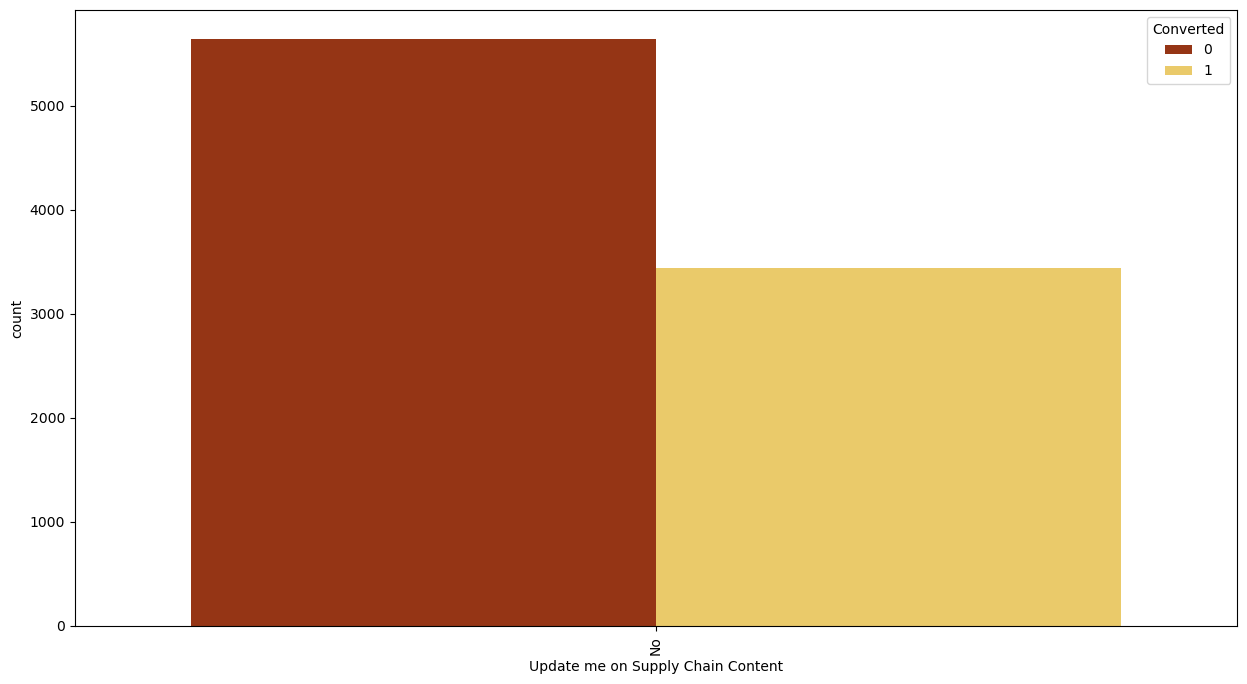

In [251]:
# Analysis of Update me on Supply Chain Content:
plt.figure(figsize=(15,8))
sns.countplot(x='Update me on Supply Chain Content',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [252]:
# Most Entries are No so column can not be used for Proper Inference

(array([0]), [Text(0, 0, 'No')])

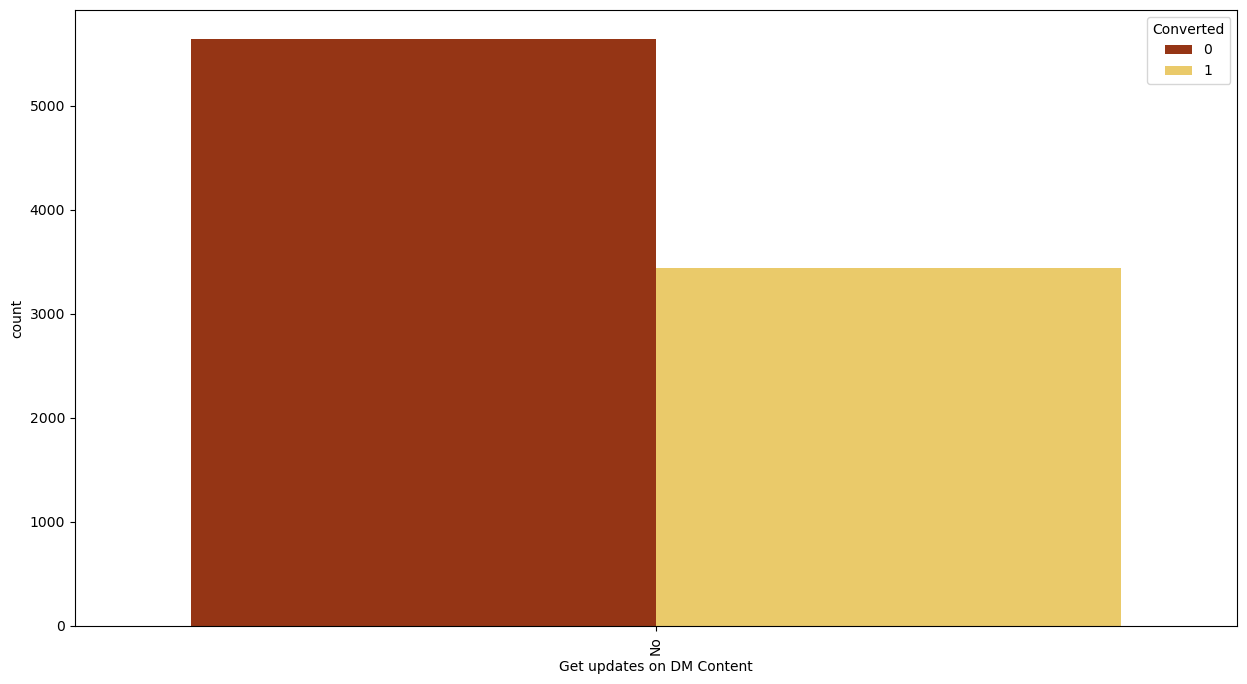

In [253]:
# Analysis of Get updates on DM Content:
plt.figure(figsize=(15,8))
sns.countplot(x='Get updates on DM Content',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [254]:
# Most of the entries are No so this column can not be used for Proper Inference

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

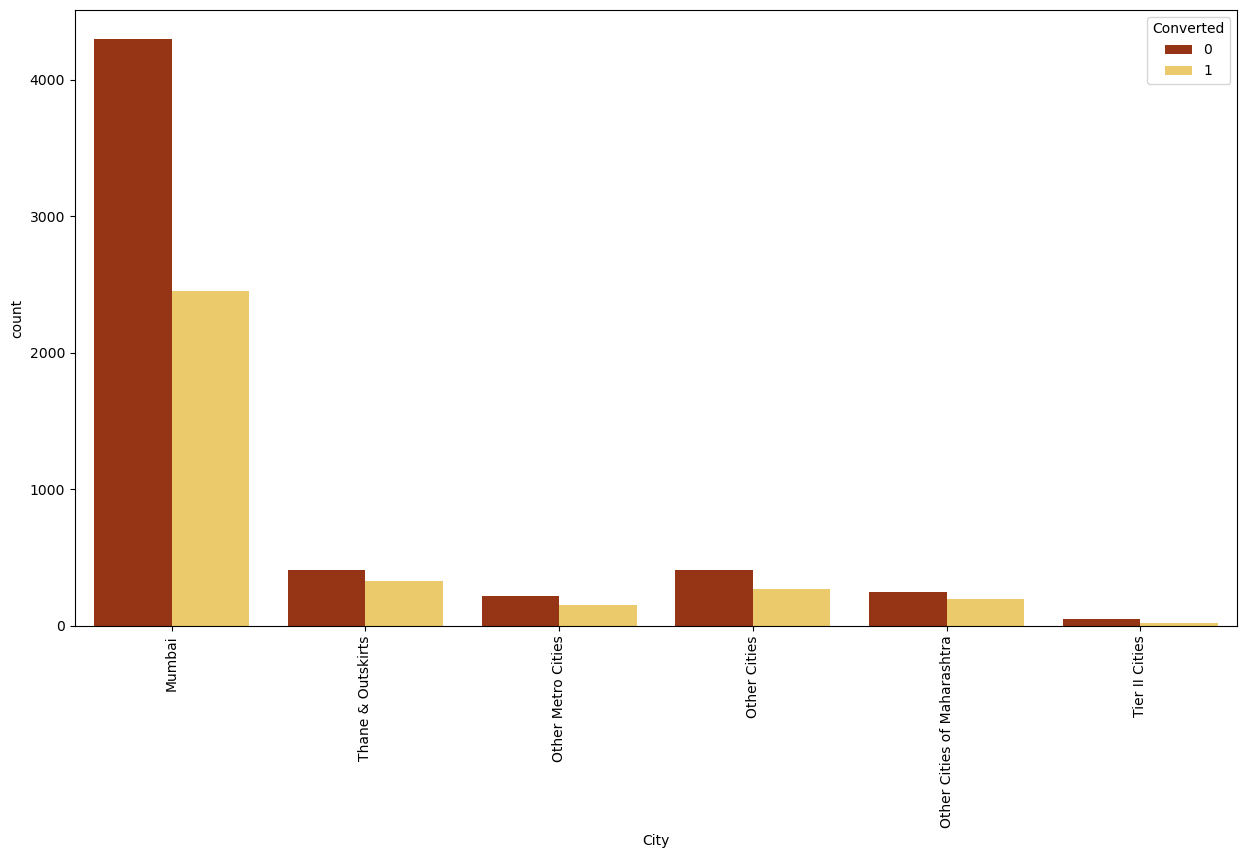

In [255]:
# Analysis of City column:

plt.figure(figsize=(15,8))
sns.countplot(x='City',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [256]:
# Mumbai has most number of Leads

(array([0]), [Text(0, 0, 'No')])

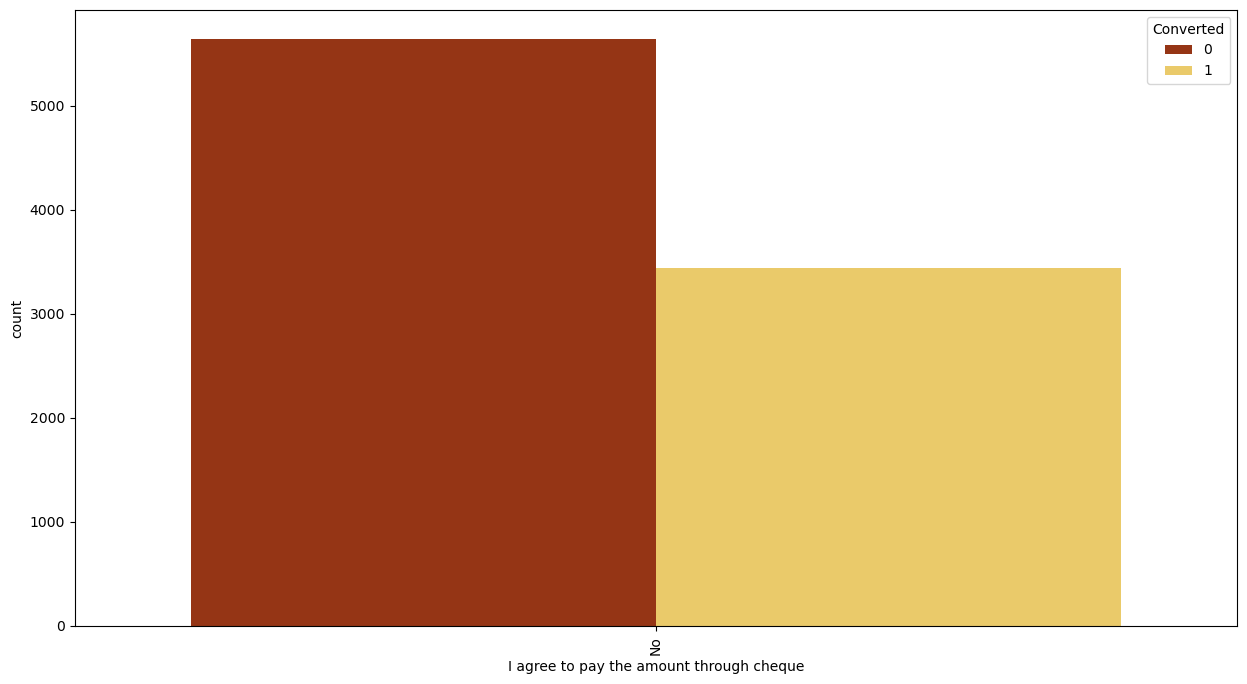

In [257]:
# Analysis of I agree to pay the amount through cheque:

plt.figure(figsize=(15,8))
sns.countplot(x='I agree to pay the amount through cheque',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [258]:
# Most of the entries are No, this column can not be used for proper inference

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

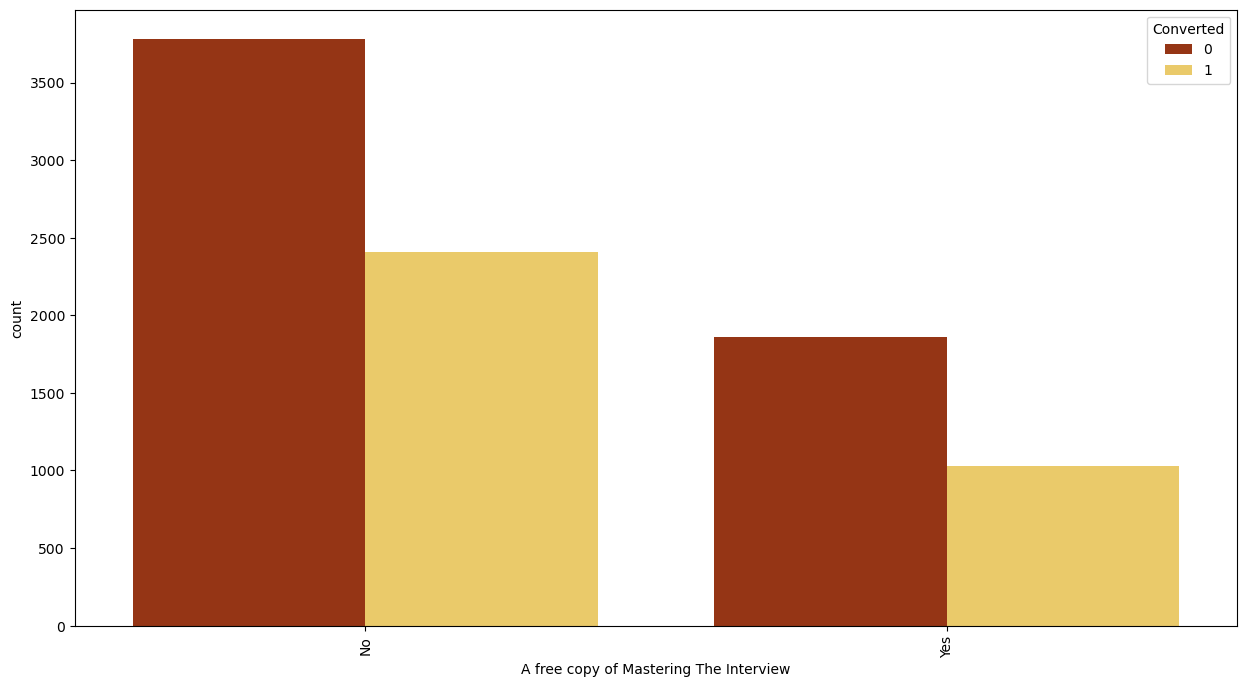

In [259]:
# Analysis of  A free copy of Mastering The Interview column:

plt.figure(figsize=(15,8))
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [260]:
# Most entries are No, No Proper inference can be drawn from the column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

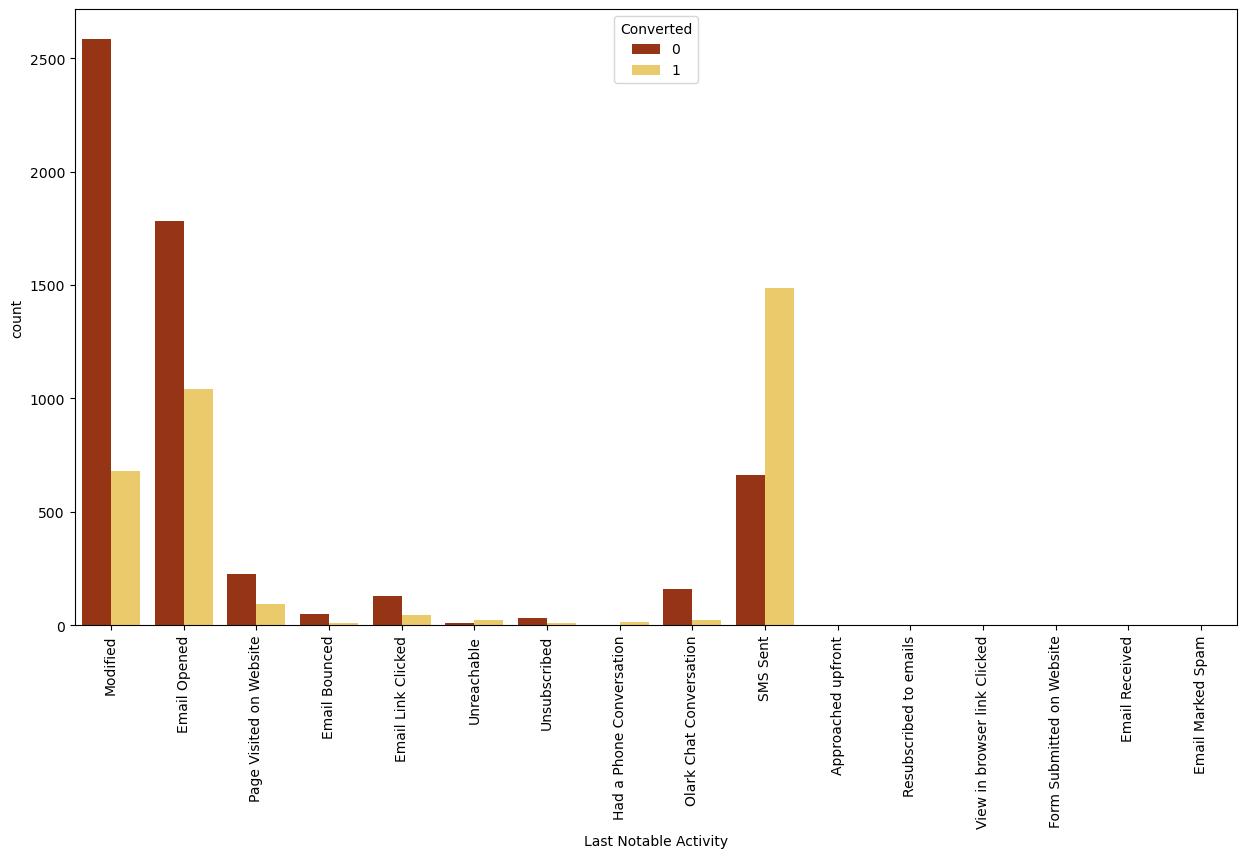

In [261]:
# Analysis of Last Notable Activity column:

plt.figure(figsize=(15,8))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead,palette='afmhot')
plt.xticks(rotation=90)

In [262]:
# Dropping Column Which are not useful for Model Building:
lead=lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [263]:
lead.shape

(9074, 14)

In [264]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [265]:
# Converting Yes/No to 1/0:
var_list=['Do Not Email','Do Not Call']
def binary_map(x):
    return x.map({'Yes':1,'No':0})
lead[var_list]=lead[var_list].apply(binary_map)

In [266]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified


In [267]:
# Dummy Variable for Categorical Variable
dummy=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [268]:
lead=pd.concat([lead,dummy],axis=1)

In [269]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [270]:
# Dropping the Columns for which dummy has been created:
lead=lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'],axis=1)
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [271]:
# Split the Data into Train and Test Data:

from sklearn.model_selection import train_test_split
X=lead.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [272]:
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [274]:
# Scaling the Variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [281]:
# Feature Selection using RFE:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [282]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [283]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 26),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Last A

In [285]:
col=X_train.columns[rfe.support_]

In [286]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [287]:
# Model Building
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Fri, 23 Jun 2023   Deviance:                       5180.6
Time:                        16:23:46   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Others                                     1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

In [288]:
# P-Value of What is your current occupation_Housewife is high we can drop the column
col=col.drop('What is your current occupation_Housewife')

In [289]:
#Model-2:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Fri, 23 Jun 2023   Deviance:                       5184.5
Time:                        16:24:03   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Others                                     1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

In [290]:
# P-Value of Last Notable Activity_Had a Phone Conversation is high Same Can be dropped:

col=col.drop('Last Notable Activity_Had a Phone Conversation')

In [292]:
#Model-3:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Fri, 23 Jun 2023   Deviance:                       5186.1
Time:                        16:25:23   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Others                                     2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [293]:
# P-Value of What is your current occupation_Student is high Same can be dropped:
col=col.drop('What is your current occupation_Student')

In [294]:
# Model-4:
#Model-3:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Fri, 23 Jun 2023   Deviance:                       5189.0
Time:                        16:27:25   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Others                                     2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [295]:
# P-Value of Lead Origin_Lead Add Form is high so same can be removed:
col=col.drop('Lead Origin_Lead Add Form')

In [296]:
# Model-5:

X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Fri, 23 Jun 2023   Deviance:                       5192.3
Time:                        16:29:04   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Others                                     2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

In [297]:
# Checking For VIF Values:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


In [298]:
# Dropping the Column What is your current occupation_Unemployed:
col=col.drop('What is your current occupation_Unemployed')

In [299]:
#Model-6
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Fri, 23 Jun 2023   Deviance:                       5200.0
Time:                        16:36:40   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Others                                     2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [300]:
# Dropping the Column Lead Origin_Lead Import:

col=col.drop('Lead Origin_Lead Import')

In [301]:
#Model-7
X_train_sm=sm.add_constant(X_train[col])
logm7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Fri, 23 Jun 2023   Deviance:                       5203.0
Time:                        16:37:59   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Others                                     2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [302]:
vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,Specialization_others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [303]:
# Making Prediction on Test Set
y_train_pred=result.predict(X_train_sm)
y_train_pred[:10]

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
1281    0.745221
2880    0.097496
4971    0.965877
7536    0.851963
1248    0.772910
dtype: float64

In [304]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.19249248, 0.10707422, 0.32948401, ..., 0.91831908, 0.21264862,
       0.28910751])

In [306]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred,'Prospect ID':y_train.index})
y_train_pred_final

,Converted,Converted_prob,Prospect ID
0,0,0.192492,3009
1,0,0.107074,1012
2,0,0.329484,9226
3,1,0.866550,4750
4,1,0.802188,7987
...,...,...,...
6346,0,0.182758,367
6347,1,0.934056,82
6348,0,0.918319,8199
6349,0,0.212649,7077


In [308]:
# Chossing an Arbitary Cut-off of 0.5 to put Label
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.map(lambda X:1 if X>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192492,3009,0
1,0,0.107074,1012,0
2,0,0.329484,9226,0
3,1,0.866550,4750,1
4,1,0.802188,7987,1


In [309]:
# Making The Confusion Matrix:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3459  446]
 [ 710 1736]]


In [310]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8179814202487797


In [311]:
# Metrics (Sensitivity and Specifity)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [313]:
Sensitivity= TP/(TP+FN)
Sensitivity

0.7097301717089125

In [316]:
Specificity= TN/(TN+FP)
Specificity

0.885787451984635

In [317]:
# ROC Curve for finding Optimum Cut-Off:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [318]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

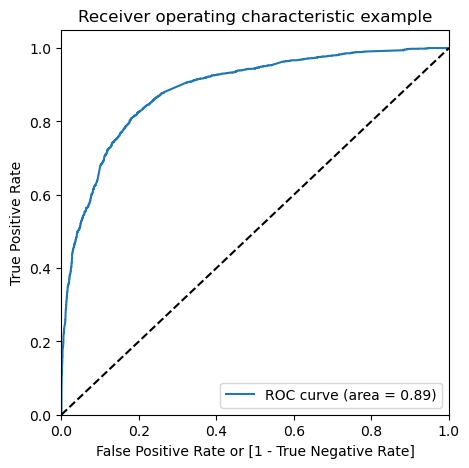

In [319]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [320]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0


In [322]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix



num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


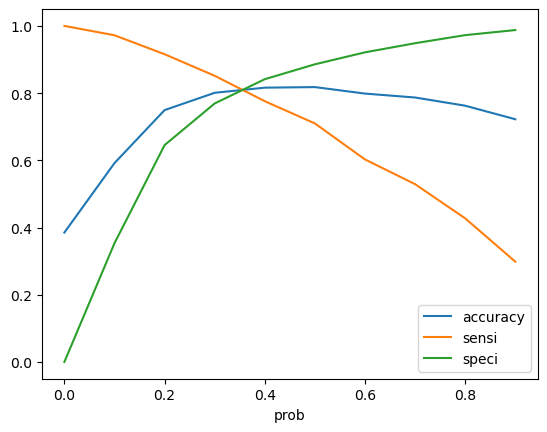

In [323]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [324]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [325]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1,80


In [326]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8132577546843017


In [327]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3173,  732],
       [ 454, 1992]], dtype=int64)

In [328]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [329]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8143908421913328


In [330]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8125480153649167


In [331]:
# Making Predictions on Test Set:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [332]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [333]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.126835
1490    0.968324
7936    0.109448
4216    0.803988
3830    0.129754
1800    0.628554
6507    0.343306
4821    0.297353
4223    0.918319
4714    0.329484
dtype: float64

In [334]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [335]:
y_test_df = pd.DataFrame(y_test)

In [336]:
y_test_df['Prospect ID'] = y_test_df.index

In [337]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [338]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [339]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [340]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [341]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [344]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [345]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.126835,0
1,1,1490,0.968324,1
2,0,7936,0.109448,0
3,1,4216,0.803988,1
4,0,3830,0.129754,0


In [346]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8071979434447301


In [347]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  326],
       [ 199,  790]], dtype=int64)

In [348]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [349]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7987866531850354


In [350]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.81199538638985


In [351]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.126835,0,13
1,1,1490,0.968324,1,97
2,0,7936,0.109448,0,11
3,1,4216,0.803988,1,80
4,0,3830,0.129754,0,13


In [352]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
1,1,1490,0.968324,1,97
8,1,4223,0.918319,1,92
16,1,1946,0.924928,1,92
21,1,2461,0.992885,1,99
23,1,5822,0.998023,1,100
...,...,...,...,...,...
2694,1,1566,0.946456,1,95
2699,1,6461,0.961588,1,96
2703,1,5741,0.909023,1,91
2715,1,6299,0.872498,1,87


In [353]:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.858769
Lead Source_Reference                                   3.340121
What is your current occupation_Working Professional    2.606375
Last Activity_Others                                    2.198777
Last Notable Activity_Unreachable                       1.546980
Last Activity_Unsubscribed                              1.378366
Last Activity_SMS Sent                                  1.325023
Total Time Spent on Website                             1.097643
Lead Source_Olark Chat                                  1.091475
const                                                  -0.071692
Last Notable Activity_Modified                         -0.881599
Last Activity_Olark Chat Conversation                  -0.948539
Lead Origin_Landing Page Submission                    -1.186301
Specialization_others                                  -1.198306
Do Not Email                                           -1.678278
dtype: float64

In [354]:
# The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
# The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
# The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
#The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
# The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
# The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
# The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
#The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
# The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.